#AIML Week-6 Internship Project


## **Project Name: Synthetic Data–Driven Stroke Prediction System**


**Project Type:** Generative AI • CTGAN • Machine Learning • Healthcare Analytics  

**Dataset Link:**  
[Stroke Prediction Dataset — Kaggle](https://www.kaggle.com/datasets/fedesoriano/stroke-prediction-dataset)

**Project Prepared By:** *Maaz Mahboob*


## **Problem Statement**

Stroke is one of the leading causes of disability and death worldwide, yet early detection remains challenging due to the limited number of confirmed stroke cases in most clinical datasets. This imbalance makes it difficult for machine learning models to learn meaningful patterns, often causing them to ignore high-risk patients.

The goal of this project is to explore how **Generative AI**, specifically **CTGAN (Conditional Tabular GAN)**, can help overcome this problem by generating realistic synthetic samples for the minority class.  
By creating a more balanced dataset and retraining classification models, the study evaluates whether synthetic data can strengthen the model’s ability to identify stroke cases more accurately.

The final aim is to build a more dependable prediction system that supports early medical assessment and helps reduce preventable stroke incidents.


## Notebook Structure

* This project is organized into four notebooks, each addressing a key stage of the workflow.

#### **1_EDA.ipynb**
* Data loading, cleaning, preprocessing, and exploratory data analysis.
* Includes class distribution and density analysis to understand data imbalance and feature behavior.

#### 2_CTGAN_Training.ipynb
* Training the CTGAN model on the minority stroke class.
* Generating synthetic samples for data augmentation.

#### 3_Model_Training.ipynb
* Training machine learning models on the original dataset.
* Training models on the augmented dataset.
* Comparing performance across both settings.

#### 4_Streamlit_Deployment.ipynb
* Deploying the best-performing model using Streamlit.
* Enabling interactive predictions and real-time inference.


## **Purpose of This Notebook**

The goal of this notebook is to explore the dataset in detail, identify potential data quality issues, and prepare a clean version for downstream tasks.  
This step forms the foundation of the entire pipeline and ensures reliable inputs for CTGAN training and machine-learning models.


## **What This Notebook Covers**

- Loading and inspecting the dataset  
- Understanding feature types and distributions  
- Handling missing values and duplicates  
- Detecting inconsistencies and outliers  
- Encoding categorical variables  
- Plotly-based visualizations for deeper insight  
- Exporting a cleaned dataset for the next module  


---
## **Coding Section**
Below is the complete implementation for the EDA process.
---


## Imports / Library Setup


In [ ]:
import pandas as pd
import numpy as np
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from scipy import stats
from sklearn.preprocessing import LabelEncoder
from sklearn.decomposition import PCA
from google.colab import drive

### 1. LOAD DATASET FROM GOOGLE DRIVE

In [ ]:
drive.mount('/content/drive')

# Load dataset
df = pd.read_csv('/content/drive/MyDrive/healthcare-dataset-stroke-data.csv')
df_original = df.copy()

print("Dataset loaded successfully")


Mounted at /content/drive
Dataset loaded successfully


### STEP 2:  DATASET DIMENSIONS

In [ ]:
print("\n STEP 2: DATASET DIMENSIONS")
print("-"*80)

num_rows, num_columns = df.shape

print(f'Number of rows: {num_rows}')
print(f'Number of columns: {num_columns}')


 STEP 2: DATASET DIMENSIONS
--------------------------------------------------------------------------------
Number of rows: 5110
Number of columns: 12


###STEP 3: DATASET FIRST LOOK

In [ ]:
print("\nSTEP 3: DATASET FIRST LOOK")
print("-"*80)

print("\nFirst 7 Rows of the Dataset:\n")
df.head(10)


STEP 3: DATASET FIRST LOOK
--------------------------------------------------------------------------------

First 7 Rows of the Dataset:



id  gender   age  hypertension  heart_disease ever_married  \
0   9046    Male  67.0             0              1          Yes   
1  51676  Female  61.0             0              0          Yes   
2  31112    Male  80.0             0              1          Yes   
3  60182  Female  49.0             0              0          Yes   
4   1665  Female  79.0             1              0          Yes   
5  56669    Male  81.0             0              0          Yes   
6  53882    Male  74.0             1              1          Yes   
7  10434  Female  69.0             0              0           No   
8  27419  Female  59.0             0              0          Yes   
9  60491  Female  78.0             0              0          Yes   

       work_type Residence_type  avg_glucose_level   bmi   smoking_status  \
0        Private          Urban             228.69  36.6  formerly smoked   
1  Self-employed          Rural             202.21   NaN     never smoked   
2        Private          Rural             105.92  32.5     never smoked   
3        Private          Urban             171.23  34.4           smokes   
4  Self-employed          Rural             174.12  24.0     never smoked   
5        Private          Urban             186.21  29.0  formerly smoked   
6        Private          Rural              70.09  27.4     never smoked   
7        Private          Urban              94.39  22.8     never smoked   
8        Private          Rural              76.15   NaN          Unknown   
9        Private          Urban              58.57  24.2          Unknown   

   stroke  
0       1  
1       1  
2       1  
3       1  
4       1  
5       1  
6       1  
7       1  
8       1  
9       1

### STEP 4: DATASET INFORMATION

In [ ]:
print("\n STEP 4: DATASET INFORMATION")
print("-"*80)

print("\nDataset Info:")
df.info()


 STEP 4: DATASET INFORMATION
--------------------------------------------------------------------------------

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


### STEP 5: DATASET DESCRIPTION

In [ ]:
print("\n STEP 5: DATASET DESCRIPTION")
print("-"*80)

print("\nDescription of the Dataset:")
df.describe()


 STEP 5: DATASET DESCRIPTION
--------------------------------------------------------------------------------

Description of the Dataset:


id          age  hypertension  heart_disease  \
count   5110.000000  5110.000000   5110.000000    5110.000000   
mean   36517.829354    43.226614      0.097456       0.054012   
std    21161.721625    22.612647      0.296607       0.226063   
min       67.000000     0.080000      0.000000       0.000000   
25%    17741.250000    25.000000      0.000000       0.000000   
50%    36932.000000    45.000000      0.000000       0.000000   
75%    54682.000000    61.000000      0.000000       0.000000   
max    72940.000000    82.000000      1.000000       1.000000   

       avg_glucose_level          bmi       stroke  
count        5110.000000  4909.000000  5110.000000  
mean          106.147677    28.893237     0.048728  
std            45.283560     7.854067     0.215320  
min            55.120000    10.300000     0.000000  
25%            77.245000    23.500000     0.000000  
50%            91.885000    28.100000     0.000000  
75%           114.090000    33.100000     0.000000  
max           271.740000    97.600000     1.000000

In [ ]:
print("\n" + "-"*80)
print("TARGET VARIABLE DISTRIBUTION: STROKE VS NO STROKE")
print("-"*80)

# Count distribution
print(df['stroke'].value_counts())

# Stroke rate (1 = stroke)
stroke_rate = df['stroke'].mean() * 100
no_stroke_rate = (1 - df['stroke'].mean()) * 100

print(f"\nNo-Stroke Rate: {no_stroke_rate:.2f}%")
print(f"Stroke (Positive Case) Rate: {stroke_rate:.2f}%")

print("\n" + "-"*80)
print("OBSERVATION")
print("-"*80)
print(
    "The dataset shows a significant class imbalance, with stroke cases forming only "
    f"{stroke_rate:.2f}% of the total samples. \nThis imbalance can negatively affect "
    "model performance, especially in detecting minority (stroke) cases."
)



--------------------------------------------------------------------------------
TARGET VARIABLE DISTRIBUTION: STROKE VS NO STROKE
--------------------------------------------------------------------------------
stroke
0    4861
1     249
Name: count, dtype: int64

No-Stroke Rate: 95.13%
Stroke (Positive Case) Rate: 4.87%

--------------------------------------------------------------------------------
OBSERVATION
--------------------------------------------------------------------------------
The dataset shows a significant class imbalance, with stroke cases forming only 4.87% of the total samples. 
This imbalance can negatively affect model performance, especially in detecting minority (stroke) cases.


### STEP 6 :Unique values per column


In [ ]:
print("Number of unique values in each column:\n")
df.nunique()


Number of unique values in each column:



id                   5110
gender                  3
age                   104
hypertension            2
heart_disease           2
ever_married            2
work_type               5
Residence_type          2
avg_glucose_level    3979
bmi                   418
smoking_status          4
stroke                  2
dtype: int64

### STEP 7: VARIABLES DESCRIPTION

In [ ]:
print("\n STEP 7: VARIABLE DESCRIPTIONS")
print("-"*80)

print("""
VARIABLE DESCRIPTIONS:
======================

DEMOGRAPHIC FEATURES:
---------------------
1. gender
   • Gender of the patient (Male/Female/Other).

2. age
   • Age in years; a key factor linked to stroke risk.

3. ever_married
   • Marital status, often related to lifestyle and health stability.

4. Residence_type
   • Living area (Urban/Rural); used to observe location-based risk patterns.

SOCIOECONOMIC & LIFESTYLE FEATURES:
-----------------------------------
5. work_type
   • Employment category, which may influence stress and living conditions.

6. smoking_status
   • Smoking history (never, former, current); one of the major stroke risk indicators.

MEDICAL HISTORY:
----------------
7. hypertension
   • Whether the patient has high blood pressure (0/1).

8. heart_disease
   • Indicates presence of heart-related issues (0/1).

CLINICAL MEASUREMENTS:
----------------------
9. avg_glucose_level
   • Average glucose level in blood; elevated levels are associated with stroke risk.

10. bmi
    • Body Mass Index; reflects weight-related health status.

IDENTIFIER:
-----------
11. id
    • Unique identifier for each patient record.

TARGET VARIABLE:
----------------
12. stroke
    • Stroke occurrence (1 = Stroke, 0 = No Stroke).
""")



 STEP 7: VARIABLE DESCRIPTIONS
--------------------------------------------------------------------------------

VARIABLE DESCRIPTIONS:

DEMOGRAPHIC FEATURES:
---------------------
1. gender
   • Gender of the patient (Male/Female/Other).

2. age
   • Age in years; a key factor linked to stroke risk.

3. ever_married
   • Marital status, often related to lifestyle and health stability.

4. Residence_type
   • Living area (Urban/Rural); used to observe location-based risk patterns.

SOCIOECONOMIC & LIFESTYLE FEATURES:
-----------------------------------
5. work_type
   • Employment category, which may influence stress and living conditions.

6. smoking_status
   • Smoking history (never, former, current); one of the major stroke risk indicators.

MEDICAL HISTORY:
----------------
7. hypertension
   • Whether the patient has high blood pressure (0/1).

8. heart_disease
   • Indicates presence of heart-related issues (0/1).

CLINICAL MEASUREMENTS:
----------------------
9. avg_glucose_le

#  Part 2: PREPROCESSING



###STEP 7: MISSING VALUES COUNT

In [ ]:
print("\n STEP 7: MISSING VALUES COUNT")
print("-"*80)

print("\nMissing values count:\n")
missing_counts = df.isnull().sum()
print(missing_counts)

print(f"\nTotal missing values: {missing_counts.sum()}")


 STEP 7: MISSING VALUES COUNT
--------------------------------------------------------------------------------

Missing values count:

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

Total missing values: 201


### VISUALIZING MISSING VALUES

In [ ]:
print("\n VISUALIZING MISSING VALUES")
print("-"*80)

missing_data = df.isnull().sum()

fig = px.bar(
    x=missing_data.index,
    y=missing_data.values,
    labels={'x': 'Columns', 'y': 'Missing Count'},
    title='Missing Values Count by Column',
    color=missing_data.values,
    color_continuous_scale='Reds'
)
fig.update_traces(texttemplate='%{y}', textposition='outside')
fig.update_layout(height=500, width=800)
fig.show()

total_missing = missing_data.sum()
if total_missing == 0:
    print("✓ No missing values found in the dataset! ✅")
else:
    print(f"⚠ Found {total_missing} missing values in the dataset.")




 VISUALIZING MISSING VALUES
--------------------------------------------------------------------------------


⚠ Found 201 missing values in the dataset.


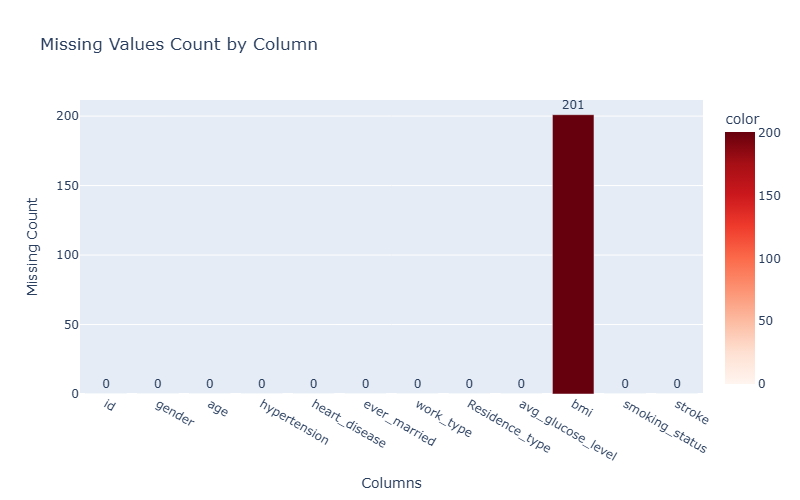

In [ ]:
# 1. Create age groups for realistic BMI imputation
df['age_group'] = pd.cut(
    df['age'],
    bins=[0, 18, 35, 50, 65, 120],
    labels=['0-18', '19-35', '36-50', '51-65', '66+']
)

# 2. Impute BMI using group-wise median (with observed=False to avoid warnings)
bmi_missing_before = df['bmi'].isnull().sum()

df['bmi'] = df.groupby(
    ['gender', 'age_group', 'smoking_status'],
    observed=False
)['bmi'].transform(lambda x: x.fillna(x.median()))

bmi_missing_after = df['bmi'].isnull().sum()

df.drop(columns=['age_group'], inplace=True)

print(f"\nBMI missing before: {bmi_missing_before}")
print(f"BMI missing after:  {bmi_missing_after}")
print("\nBMI values imputed using group-wise median based on gender, age_group, and smoking_status.")



BMI missing before: 201
BMI missing after:  0

BMI values imputed using group-wise median based on gender, age_group, and smoking_status.


### STEP 8: Check & Handle Duplicate Rows

In [ ]:
print("\n" + "-"*80)
print("DUPLICATE RECORDS CHECK")
print("-"*80)

duplicates = df.duplicated().sum()
print(f"Number of duplicate rows: {duplicates}")

if duplicates == 0:
    print("✓ No duplicate records found!")
else:
    print(f"⚠ Found {duplicates} duplicate rows. Removing them...")
    df = df.drop_duplicates()
    print("✓ Duplicate rows removed successfully.")



--------------------------------------------------------------------------------
DUPLICATE RECORDS CHECK
--------------------------------------------------------------------------------
Number of duplicate rows: 0
✓ No duplicate records found!


###STEP 9: Standardize /Fix Inconsisties in Categories

In [ ]:
df['gender'] = df['gender'].str.strip().str.lower()
df['ever_married'] = df['ever_married'].str.strip()
df['work_type'] = df['work_type'].str.strip()
df['Residence_type'] = df['Residence_type'].str.strip()
df['smoking_status'] = df['smoking_status'].str.strip()

###STEP 10: Outlier detection using IQR

In [ ]:
numerical_cols = ['age', 'avg_glucose_level', 'bmi']

print("\n=== Outlier Detection (IQR Method) ===")
for col in numerical_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = ((df[col] < lower_bound) | (df[col] > upper_bound)).sum()
    print(f"{col}: {outliers} outliers detected")


=== Outlier Detection (IQR Method) ===
age: 0 outliers detected
avg_glucose_level: 627 outliers detected
bmi: 123 outliers detected


In [ ]:
print("\n=== Outlier Treatment: Winsorization (1st–99th Percentile) ===")

cols_to_cap = ['avg_glucose_level', 'bmi']

for col in cols_to_cap:
    p1 = df[col].quantile(0.01)
    p99 = df[col].quantile(0.99)

    below = (df[col] < p1).sum()
    above = (df[col] > p99).sum()

    df[col] = df[col].clip(lower=p1, upper=p99)

    print(f"{col}: {below} values capped at p1 ({p1:.2f}), "
          f"{above} capped at p99 ({p99:.2f})")

print("\nNote: 'age' was not modified since no outliers were detected.")


=== Outlier Treatment: Winsorization (1st–99th Percentile) ===
avg_glucose_level: 52 values capped at p1 (56.33), 52 capped at p99 (240.71)
bmi: 52 values capped at p1 (15.11), 52 capped at p99 (52.89)

Note: 'age' was not modified since no outliers were detected.


###STEP 11: Encoding for categorical variables

In [ ]:
# Binary columns (safe for LabelEncoder)
binary_cols = ['ever_married', 'Residence_type']
label_encoders = {}

for col in binary_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le


# NOMINAL COLUMNS TO ONE-HOT ENCODE
nominal_cols = ['gender', 'work_type', 'smoking_status']

for col in nominal_cols:


    col_index = df.columns.get_loc(col)

    # One-hot encode
    dummies = pd.get_dummies(df[col], prefix=col)

    # Insert dummy columns at original position
    for dummy_col in dummies.columns[::-1]:
        df.insert(col_index, dummy_col, dummies[dummy_col])

    df.drop(columns=[col], inplace=True)

print("\n=== Encoding Complete ===")
print("Binary Encoded Columns:", binary_cols)
print("One-Hot Encoded Columns:", nominal_cols)
print("\nFinal dataset shape:", df.shape)


=== Encoding Complete ===
Binary Encoded Columns: ['ever_married', 'Residence_type']
One-Hot Encoded Columns: ['gender', 'work_type', 'smoking_status']

Final dataset shape: (5110, 21)


In [ ]:
df.head(3)

id  gender_female  gender_male  gender_other   age  hypertension  \
0   9046          False         True         False  67.0             0   
1  51676           True        False         False  61.0             0   
2  31112          False         True         False  80.0             0   

   heart_disease  ever_married  work_type_Govt_job  work_type_Never_worked  \
0              1             1               False                   False   
1              0             1               False                   False   
2              1             1               False                   False   

   ...  work_type_Self-employed  work_type_children  Residence_type  \
0  ...                    False               False               1   
1  ...                     True               False               0   
2  ...                    False               False               0   

   avg_glucose_level    bmi  smoking_status_Unknown  \
0             228.69  36.60                   False   
1             202.21  29.95                   False   
2             105.92  32.50                   False   

   smoking_status_formerly smoked  smoking_status_never smoked  \
0                            True                        False   
1                           False                         True   
2                           False                         True   

   smoking_status_smokes  stroke  
0                  False       1  
1                  False       1  
2                  False       1  

[3 rows x 21 columns]

# Part 3. EDA VISUALIZATIONS

## 3.1 UNIVARIATE ANALYSIS

In [ ]:
import plotly.graph_objects as go

# Target variable distribution
stroke_counts = df['stroke'].value_counts().sort_index()  # 0 then 1
labels = ['No Stroke (0)', 'Stroke (1)']

counts = stroke_counts.values
total = counts.sum()
percentages = (counts / total) * 100

# Bar plot
fig = go.Figure()
fig.add_trace(go.Bar(
    x=labels,
    y=counts,
    text=[f"{c} ({p:.2f}%)" for c, p in zip(counts, percentages)],
    textposition='auto',
    marker=dict(color=['#3498db', '#e74c3c'])
))

fig.update_layout(
    title='Target Variable: Stroke Class Distribution',
    xaxis_title='Class',
    yaxis_title='Count',
    height=500
)

fig.show()

# Imbalance analysis
no_stroke = stroke_counts[0]
stroke = stroke_counts[1]
imbalance_ratio = no_stroke / stroke

print("Class Imbalance Analysis")
print("-" * 30)
print(f"  No Stroke (0): {no_stroke} ({no_stroke/total*100:.2f}%)")
print(f"  Stroke (1):   {stroke} ({stroke/total*100:.2f}%)")
print(f"  Imbalance Ratio: {imbalance_ratio:.2f}:1")

if imbalance_ratio > 10:
    print("  Severity: SEVERE (class imbalance is a serious issue for modeling).")
else:
    print("  Severity: MODERATE")


Class Imbalance Analysis
------------------------------
  No Stroke (0): 4861 (95.13%)
  Stroke (1):   249 (4.87%)
  Imbalance Ratio: 19.52:1
  Severity: SEVERE (class imbalance is a serious issue for modeling).


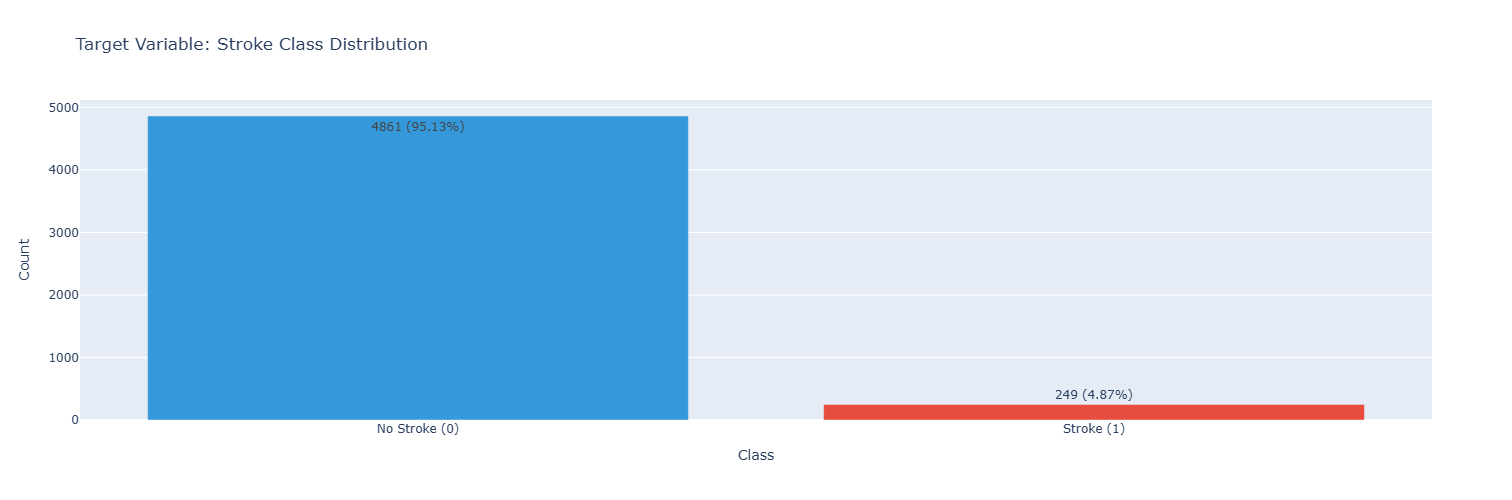

Class Imbalance Analysis
------------------------------
  No Stroke (0): 4861 (95.13%)
  Stroke (1):   249 (4.87%)
  Imbalance Ratio: 19.52:1
  Severity: SEVERE (class imbalance is a serious issue for modeling).

### Numerical Variables eda

In [ ]:
# Numerical Variables - Enhanced Distribution Analysis
for col in numerical_cols:
    # Statistical summary
    col_stats = df[col].describe()
    skewness = df[col].skew()
    kurtosis = df[col].kurtosis()

    # Create subplot with histogram, box plot, and statistics
    fig = make_subplots(
        rows=2, cols=2,
        subplot_titles=(
            f'{col} - Histogram',
            f'{col} - Box Plot',
            f'{col} - Q-Q Plot',
            'Statistical Summary'
        ),
        specs=[[{'type': 'histogram'}, {'type': 'box'}],
               [{'type': 'scatter'}, {'type': 'table'}]],
        vertical_spacing=0.12,
        horizontal_spacing=0.12
    )

    # Histogram with KDE
    fig.add_trace(
        go.Histogram(x=df[col], nbinsx=40, name='Distribution',
                    marker_color='skyblue', opacity=0.7),
        row=1, col=1
    )

    # Box plot
    fig.add_trace(
        go.Box(y=df[col], name=col, marker_color='lightcoral',
               boxmean='sd'),
        row=1, col=2
    )

    # Q-Q plot for normality check
    sorted_data = np.sort(df[col].dropna())
    theoretical_quantiles = stats.norm.ppf(np.linspace(0.01, 0.99, len(sorted_data)))
    fig.add_trace(
        go.Scatter(x=theoretical_quantiles, y=sorted_data,
                  mode='markers', marker=dict(color='purple', size=4),
                  name='Q-Q Plot'),
        row=2, col=1
    )
    fig.add_trace(
        go.Scatter(x=[theoretical_quantiles.min(), theoretical_quantiles.max()],
                  y=[sorted_data.min(), sorted_data.max()],
                  mode='lines', line=dict(color='red', dash='dash'),
                  name='Normal Line', showlegend=False),
        row=2, col=1
    )

    # Statistical summary table
    stats_table = pd.DataFrame({
        'Metric': ['Mean', 'Median', 'Std Dev', 'Min', 'Max', 'Skewness', 'Kurtosis', 'IQR'],
        'Value': [
            f"{col_stats['mean']:.2f}",
            f"{col_stats['50%']:.2f}",
            f"{col_stats['std']:.2f}",
            f"{col_stats['min']:.2f}",
            f"{col_stats['max']:.2f}",
            f"{skewness:.2f}",
            f"{kurtosis:.2f}",
            f"{col_stats['75%'] - col_stats['25%']:.2f}"
        ]
    })

    fig.add_trace(
        go.Table(
            header=dict(values=['<b>Metric</b>', '<b>Value</b>'],
                       fill_color='paleturquoise', align='left'),
            cells=dict(values=[stats_table['Metric'], stats_table['Value']],
                      fill_color='lavender', align='left')
        ),
        row=2, col=2
    )

    fig.update_layout(height=800, title_text=f"Univariate Analysis: {col}", showlegend=False)
    fig.update_xaxes(title_text=col, row=1, col=1)
    fig.update_xaxes(title_text="Theoretical Quantiles", row=2, col=1)
    fig.update_yaxes(title_text="Sample Quantiles", row=2, col=1)
    fig.show()

    print(f"{col} Analysis:")
    print(f"  Skewness: {skewness:.3f} {'(Right-skewed)' if skewness > 0.5 else '(Left-skewed)' if skewness < -0.5 else '(Symmetric)'}")
    print(f"  Kurtosis: {kurtosis:.3f} {'(Heavy-tailed)' if kurtosis > 3 else '(Light-tailed)' if kurtosis < 3 else '(Normal)'}")


age Analysis:
  Skewness: -0.137 (Symmetric)
  Kurtosis: -0.991 (Light-tailed)


avg_glucose_level Analysis:
  Skewness: 1.544 (Right-skewed)
  Kurtosis: 1.532 (Light-tailed)


bmi Analysis:
  Skewness: 0.691 (Right-skewed)
  Kurtosis: 0.637 (Light-tailed)


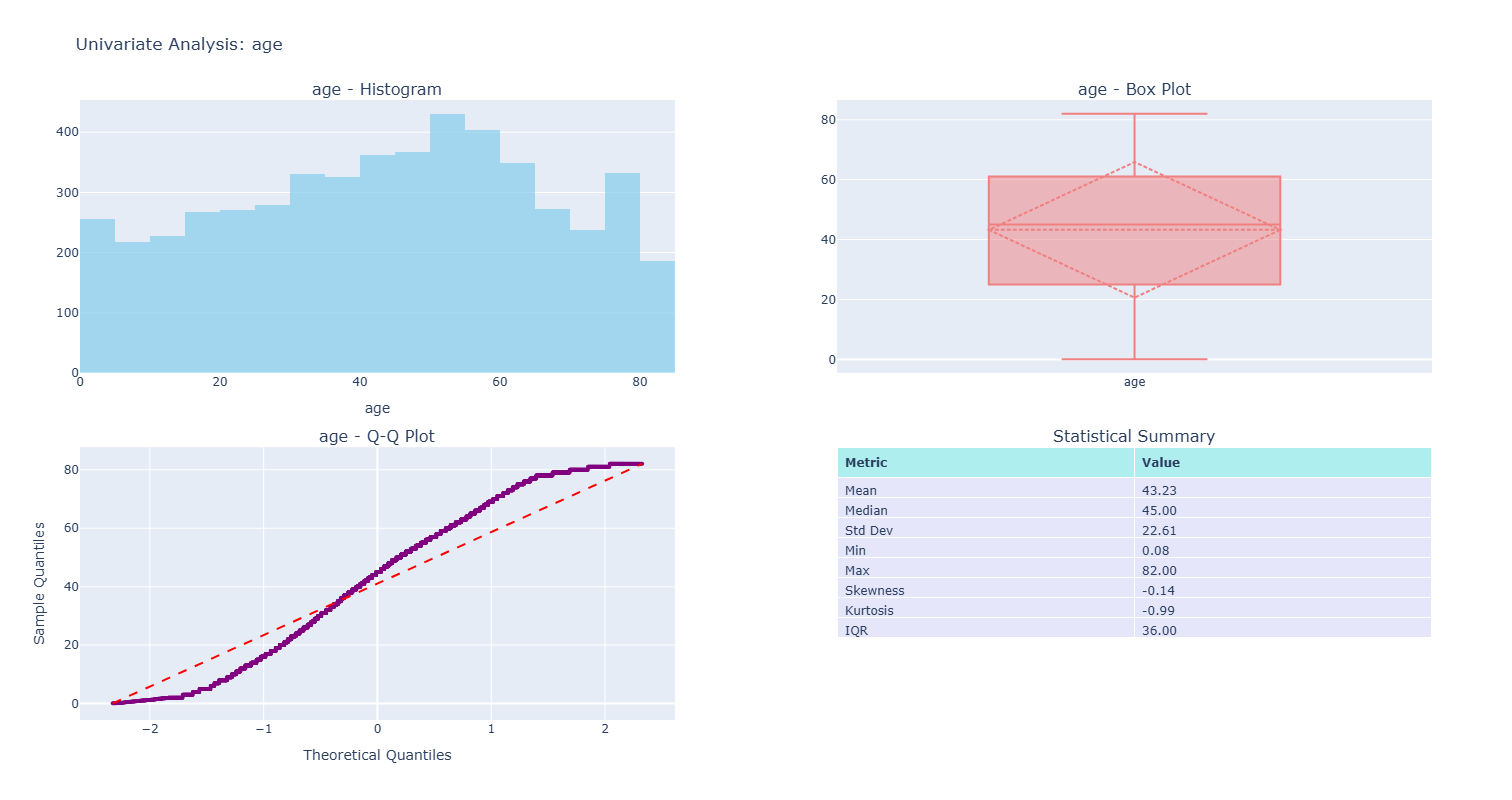

age Analysis:
  Skewness: -0.137 (Symmetric)
  Kurtosis: -0.991 (Light-tailed)

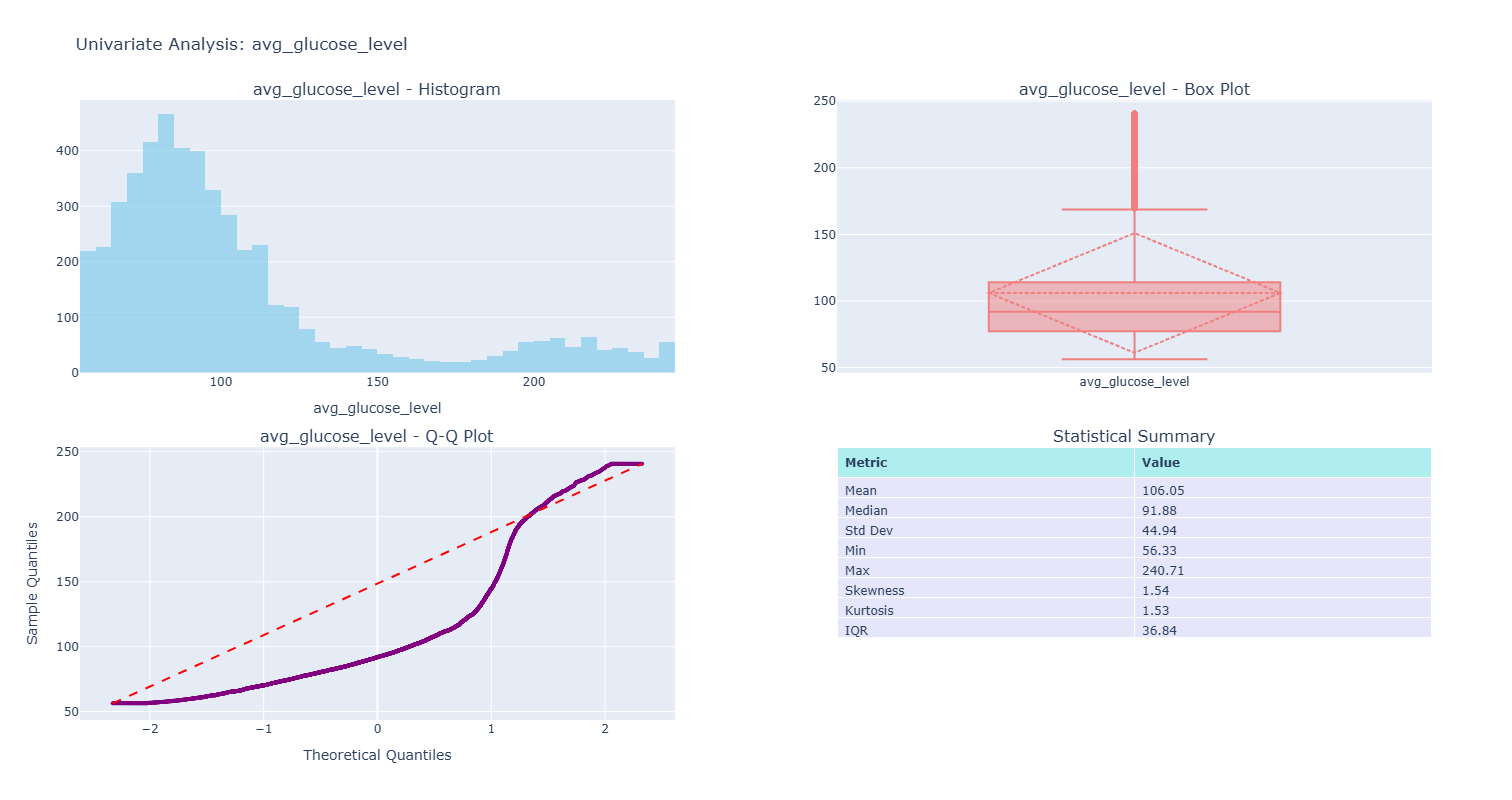

avg_glucose_level Analysis:
  Skewness: 1.544 (Right-skewed)
  Kurtosis: 1.532 (Light-tailed)

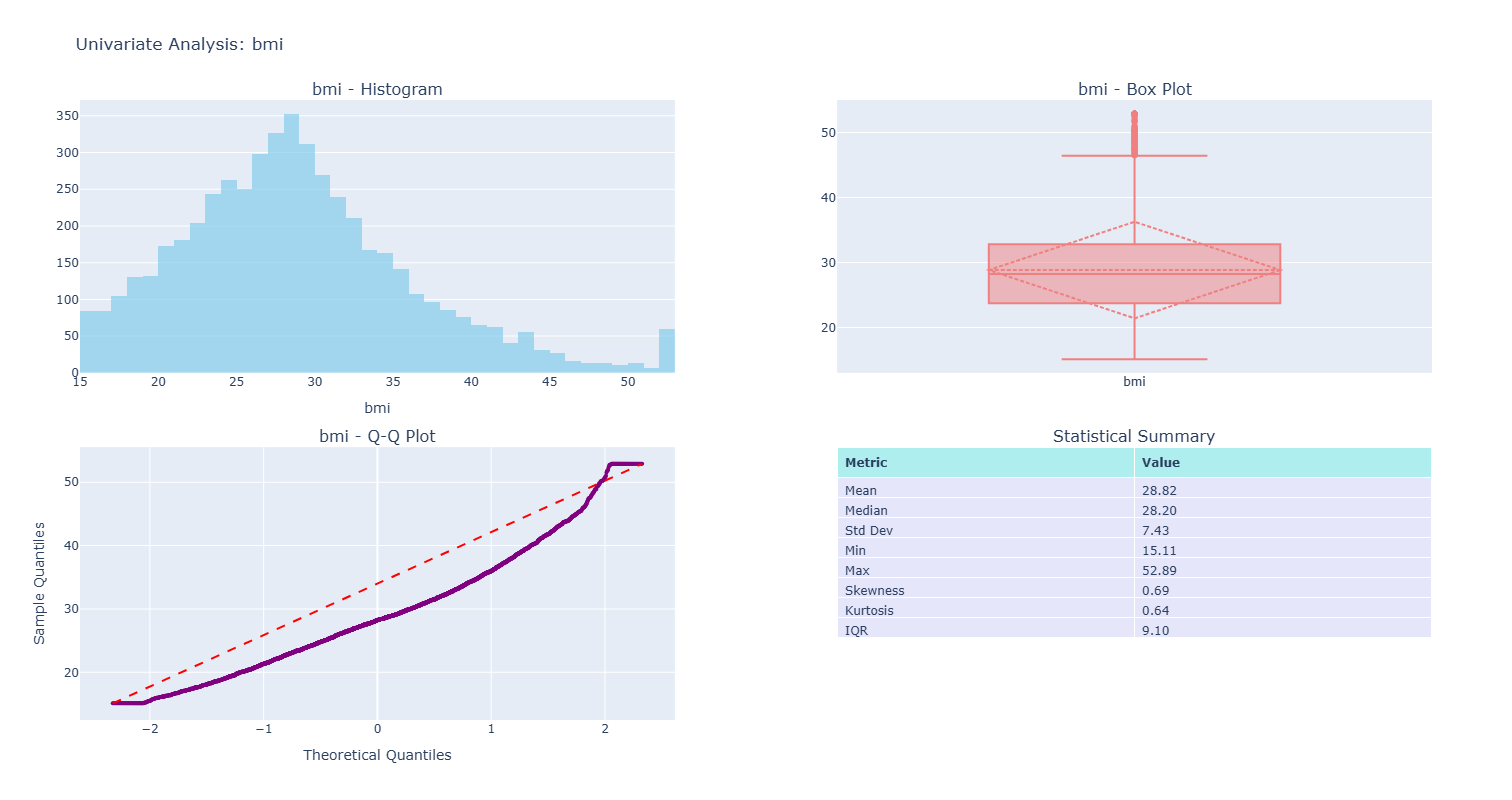

bmi Analysis:
  Skewness: 0.691 (Right-skewed)
  Kurtosis: 0.637 (Light-tailed)

### categorical features eda

In [ ]:
# These are the original categorical features before encoding
categorical_groupings = {
    "gender": [col for col in df.columns if col.startswith("gender_")],
    "work_type": [col for col in df.columns if col.startswith("work_type_")],
    "smoking_status": [col for col in df.columns if col.startswith("smoking_status_")],
    "ever_married": ["ever_married"],
    "Residence_type": ["Residence_type"]
}

for category, cols in categorical_groupings.items():

    print(f"\n{category.upper()} Distribution:")

    # If binary / label-encoded → handle directly
    if len(cols) == 1 and df[cols[0]].nunique() <= 2:
        col = cols[0]
        value_counts = df[col].value_counts()
        percentages = (value_counts / len(df) * 100).round(2)

        labels = [f"{col}_0", f"{col}_1"]

        # Pie + Bar charts
        fig = make_subplots(
            rows=1, cols=2,
            subplot_titles=(f'{col} - Proportion', f'{col} - Frequency'),
            specs=[[{'type': 'pie'}, {'type': 'bar'}]]
        )

        fig.add_trace(
            go.Pie(labels=value_counts.index, values=value_counts.values,
                   hole=0.3, textinfo='label+percent'),
            row=1, col=1
        )

        fig.add_trace(
            go.Bar(x=value_counts.index, y=value_counts.values,
                   text=value_counts.values, textposition='auto',
                   marker_color='lightseagreen'),
            row=1, col=2
        )

        fig.update_layout(height=400, title_text=f"Univariate Analysis: {col}", showlegend=False)
        fig.show()

        for idx, val in enumerate(value_counts.index):
            print(f"  {val}: {value_counts.iloc[idx]} ({percentages.iloc[idx]}%)")

        continue

    group_values = {}
    for col in cols:
        category_name = col.replace(category + "_", "")
        group_values[category_name] = df[col].sum()

    total = len(df)
    percentages = {k: round(v / total * 100, 2) for k, v in group_values.items()}

    # Pie + Bar charts
    fig = make_subplots(
        rows=1, cols=2,
        subplot_titles=(f'{category} - Proportion', f'{category} - Frequency'),
        specs=[[{'type': 'pie'}, {'type': 'bar'}]]
    )

    fig.add_trace(
        go.Pie(labels=list(group_values.keys()), values=list(group_values.values()),
               hole=0.3, textinfo='label+percent'),
        row=1, col=1
    )

    fig.add_trace(
        go.Bar(x=list(group_values.keys()), y=list(group_values.values()),
               text=list(group_values.values()), textposition='auto',
               marker_color='lightseagreen'),
        row=1, col=2
    )

    fig.update_layout(height=400, title_text=f"Univariate Analysis: {category}", showlegend=False)
    fig.show()


    for k, v in group_values.items():
        print(f"  {k}: {v} ({percentages[k]}%)")



GENDER Distribution:


  female: 2994 (58.59%)
  male: 2115 (41.39%)
  other: 1 (0.02%)

WORK_TYPE Distribution:


  Govt_job: 657 (12.86%)
  Never_worked: 22 (0.43%)
  Private: 2925 (57.24%)
  Self-employed: 819 (16.03%)
  children: 687 (13.44%)

SMOKING_STATUS Distribution:


  Unknown: 1544 (30.22%)
  formerly smoked: 885 (17.32%)
  never smoked: 1892 (37.03%)
  smokes: 789 (15.44%)

EVER_MARRIED Distribution:


  1: 3353 (65.62%)
  0: 1757 (34.38%)

RESIDENCE_TYPE Distribution:


  1: 2596 (50.8%)
  0: 2514 (49.2%)


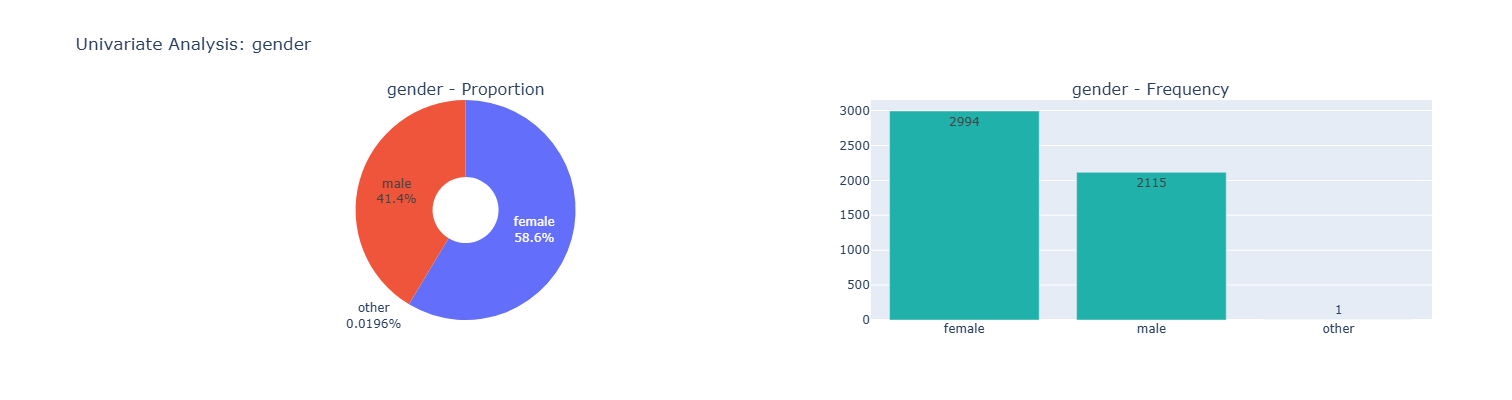

female: 2994 (58.59%)
  male: 2115 (41.39%)
  other: 1 (0.02%)


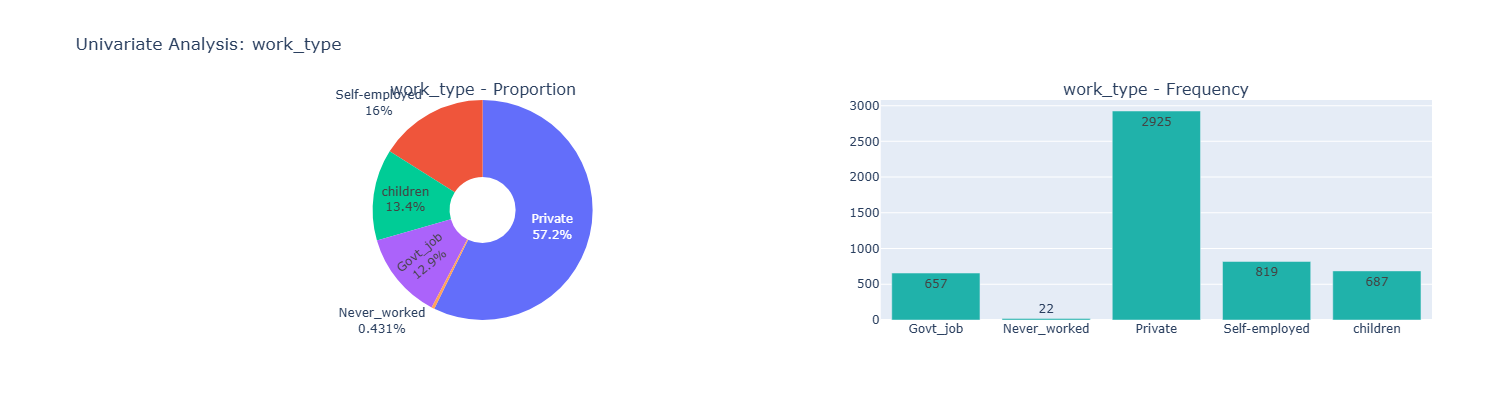

Govt_job: 657 (12.86%)
  Never_worked: 22 (0.43%)
  Private: 2925 (57.24%)
  Self-employed: 819 (16.03%)
  children: 687 (13.44%)

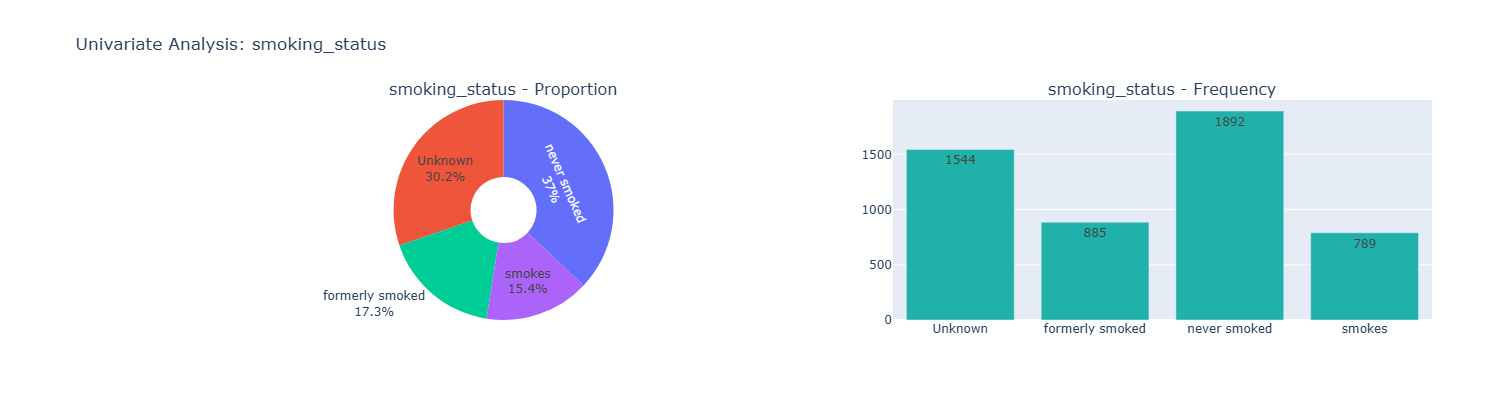

 Unknown: 1544 (30.22%)
  formerly smoked: 885 (17.32%)
  never smoked: 1892 (37.03%)
  smokes: 789 (15.44%)

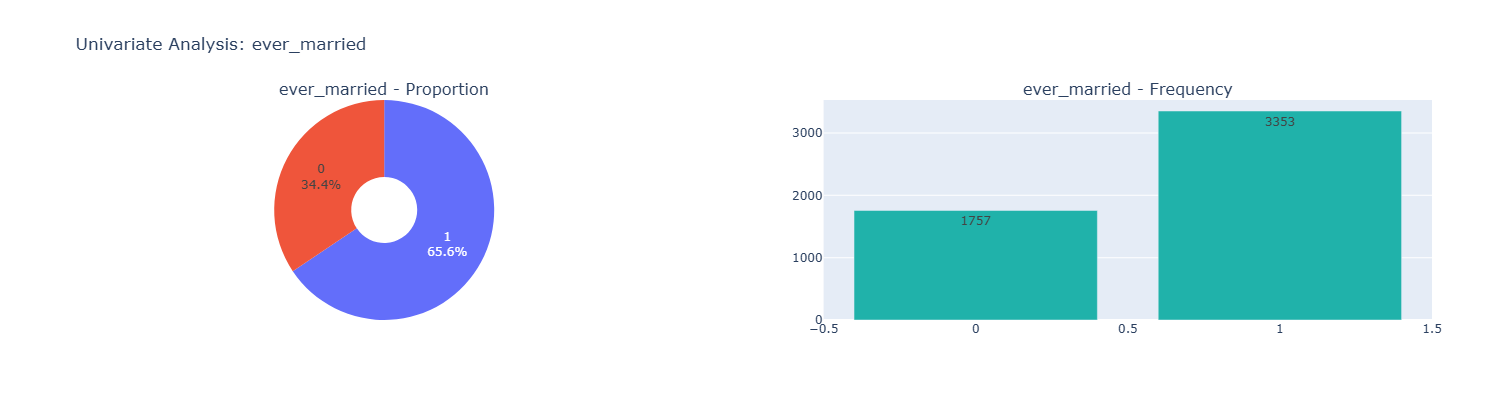

1: 3353 (65.62%)
  0: 1757 (34.38%)

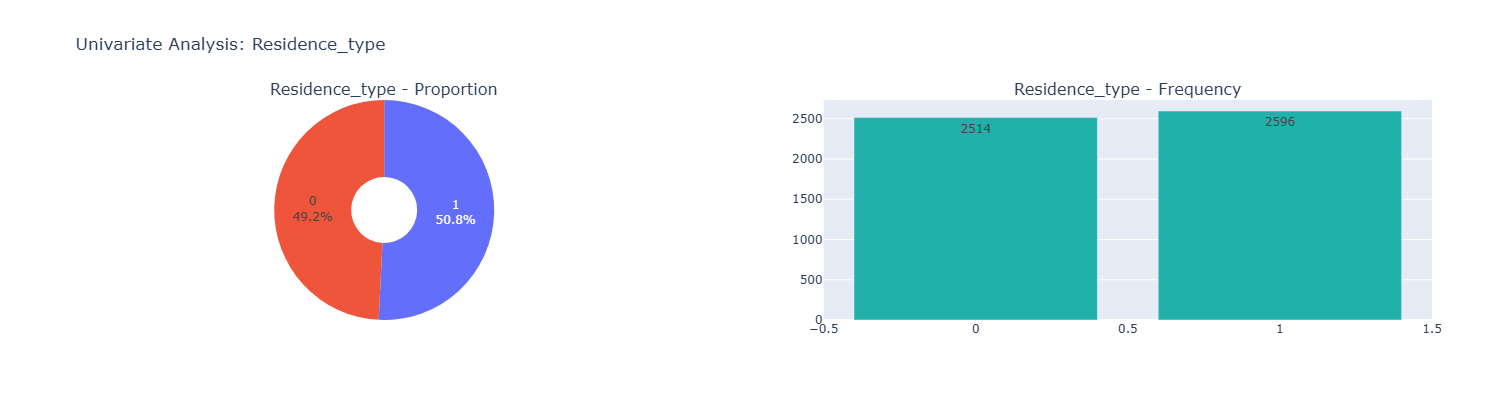

 1: 2596 (50.8%)
  0: 2514 (49.2%)

## 3.2 BIVARIATE ANALYSIS & MULTIVARIATE ANALYSIS

In [ ]:
# Numerical vs Target - Distribution Comparison with Statistical Tests
for col in numerical_cols:
    stroke_0 = df[df['stroke'] == 0][col]
    stroke_1 = df[df['stroke'] == 1][col]

    # Statistical tests
    t_stat, p_value = stats.ttest_ind(stroke_0, stroke_1, equal_var=False)

    # Create comprehensive comparison
    fig = make_subplots(
        rows=2, cols=2,
        subplot_titles=(
            f'{col} - Violin Plot by Stroke',
            f'{col} - Box Plot Comparison',
            f'{col} - Density Plot Overlay',
            'Statistical Comparison'
        ),
        specs=[[{'type': 'violin'}, {'type': 'box'}],
               [{'type': 'scatter'}, {'type': 'table'}]],
        vertical_spacing=0.15
    )

    # Violin plot
    for stroke_val, color in zip([0, 1], ['lightblue', 'lightcoral']):
        data = df[df['stroke'] == stroke_val][col]
        fig.add_trace(
            go.Violin(y=data, name=f'Stroke={stroke_val}',
                     box_visible=True, meanline_visible=True,
                     marker_color=color, opacity=0.7),
            row=1, col=1
        )

    # Box plot comparison
    fig.add_trace(
        go.Box(y=stroke_0, name='No Stroke', marker_color='lightblue',
               boxmean='sd'),
        row=1, col=2
    )
    fig.add_trace(
        go.Box(y=stroke_1, name='Stroke', marker_color='lightcoral',
               boxmean='sd'),
        row=1, col=2
    )

    # Density plots overlay
    for stroke_val, color, name in zip([0, 1], ['blue', 'red'], ['No Stroke', 'Stroke']):
        data = df[df['stroke'] == stroke_val][col].dropna()
        density = stats.gaussian_kde(data)
        x_range = np.linspace(data.min(), data.max(), 200)
        fig.add_trace(
            go.Scatter(x=x_range, y=density(x_range),
                      mode='lines', name=name, line=dict(color=color, width=2),
                      fill='tozeroy', opacity=0.3),
            row=2, col=1
        )

    # Statistical comparison table
    comparison_stats = pd.DataFrame({
        'Metric': ['Mean (No Stroke)', 'Mean (Stroke)', 'Median (No Stroke)',
                   'Median (Stroke)', 'Std (No Stroke)', 'Std (Stroke)',
                   'T-Statistic', 'P-Value', 'Significant?'],
        'Value': [
            f"{stroke_0.mean():.2f}",
            f"{stroke_1.mean():.2f}",
            f"{stroke_0.median():.2f}",
            f"{stroke_1.median():.2f}",
            f"{stroke_0.std():.2f}",
            f"{stroke_1.std():.2f}",
            f"{t_stat:.4f}",
            f"{p_value:.4e}",
            "Yes (p<0.05)" if p_value < 0.05 else "No (p≥0.05)"
        ]
    })

    fig.add_trace(
        go.Table(
            header=dict(values=['<b>Metric</b>', '<b>Value</b>'],
                       fill_color='paleturquoise', align='left'),
            cells=dict(values=[comparison_stats['Metric'], comparison_stats['Value']],
                      fill_color='lavender', align='left')
        ),
        row=2, col=2
    )

    fig.update_layout(height=900, title_text=f"Bivariate Analysis: {col} vs Stroke")
    fig.update_yaxes(title_text=col, row=1, col=1)
    fig.update_yaxes(title_text=col, row=1, col=2)
    fig.update_xaxes(title_text=col, row=2, col=1)
    fig.update_yaxes(title_text='Density', row=2, col=1)
    fig.show()

    print(f"\n{col} vs Stroke:")
    print(f"  Mean difference: {stroke_1.mean() - stroke_0.mean():.2f}")
    print(f"  T-statistic: {t_stat:.4f}, P-value: {p_value:.4e}")
    print(f"  Significant: {'Yes' if p_value < 0.05 else 'No'}")



age vs Stroke:
  Mean difference: 25.76
  T-statistic: -29.6863, P-value: 2.1157e-95
  Significant: Yes



avg_glucose_level vs Stroke:
  Mean difference: 27.37
  T-statistic: -6.9863, P-value: 2.3423e-11
  Significant: Yes



bmi vs Stroke:
  Mean difference: 1.47
  T-statistic: -3.8238, P-value: 1.6067e-04
  Significant: Yes


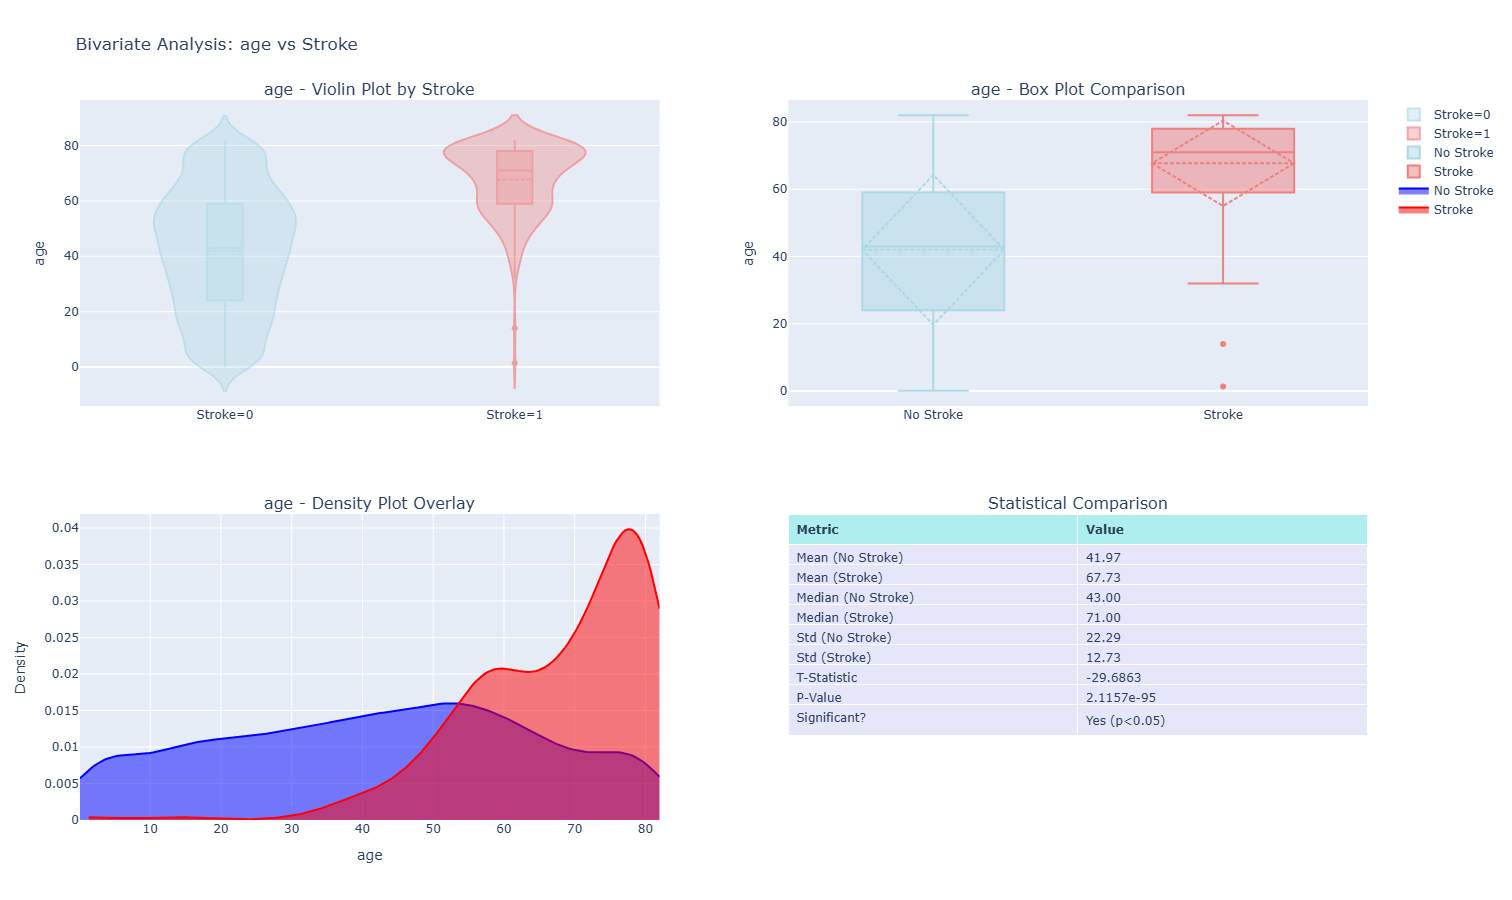

age vs Stroke:
  Mean difference: 25.76
  T-statistic: -29.6863, P-value: 2.1157e-95
  Significant: Yes

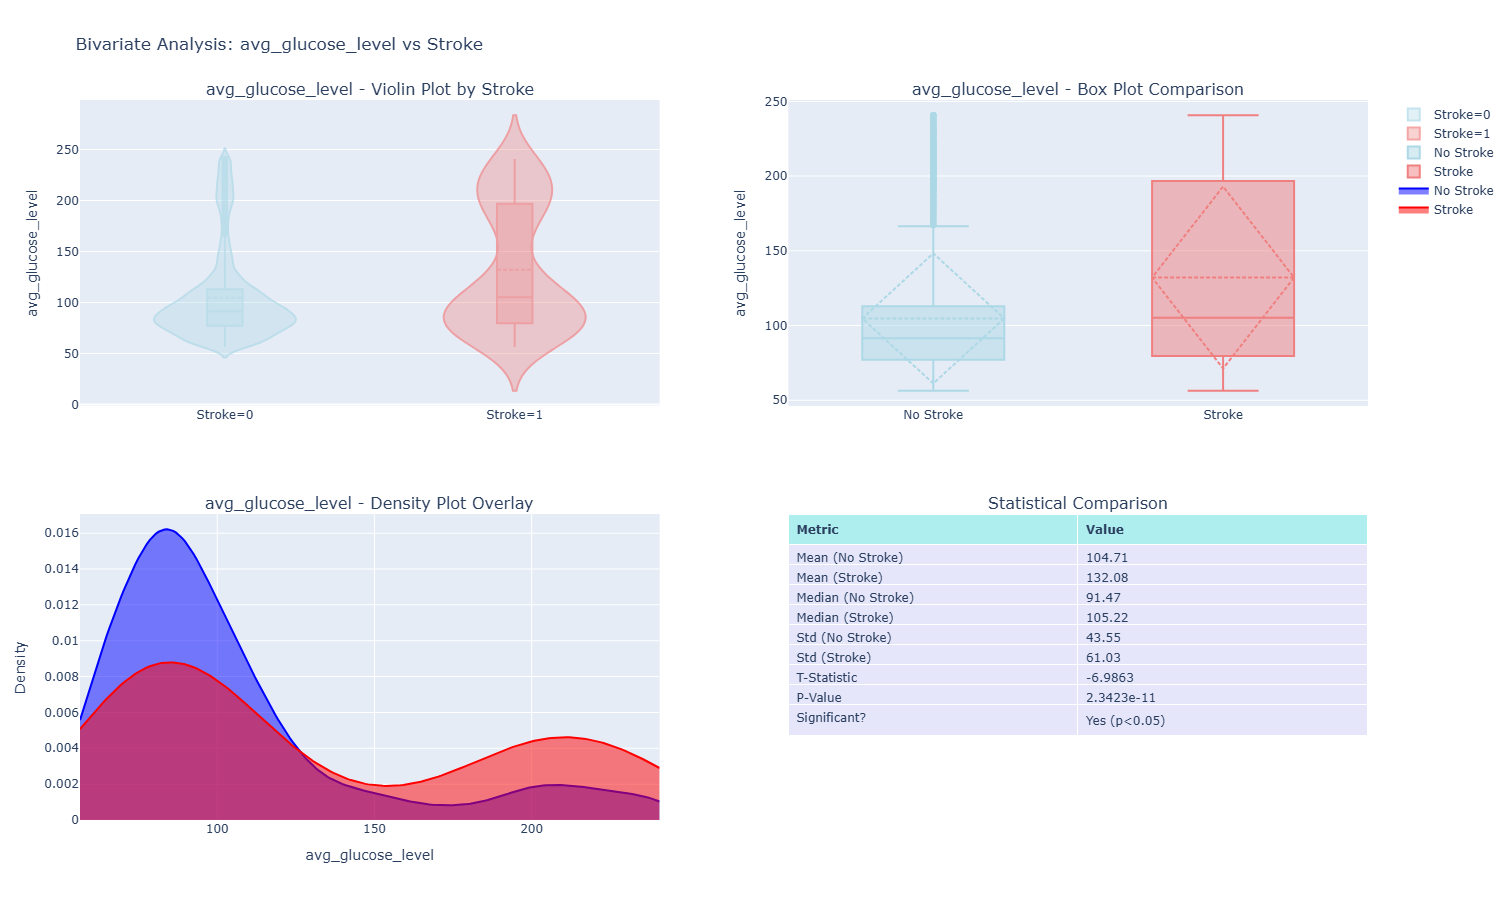


avg_glucose_level vs Stroke:
  Mean difference: 27.37
  T-statistic: -6.9863, P-value: 2.3423e-11
  Significant: Yes

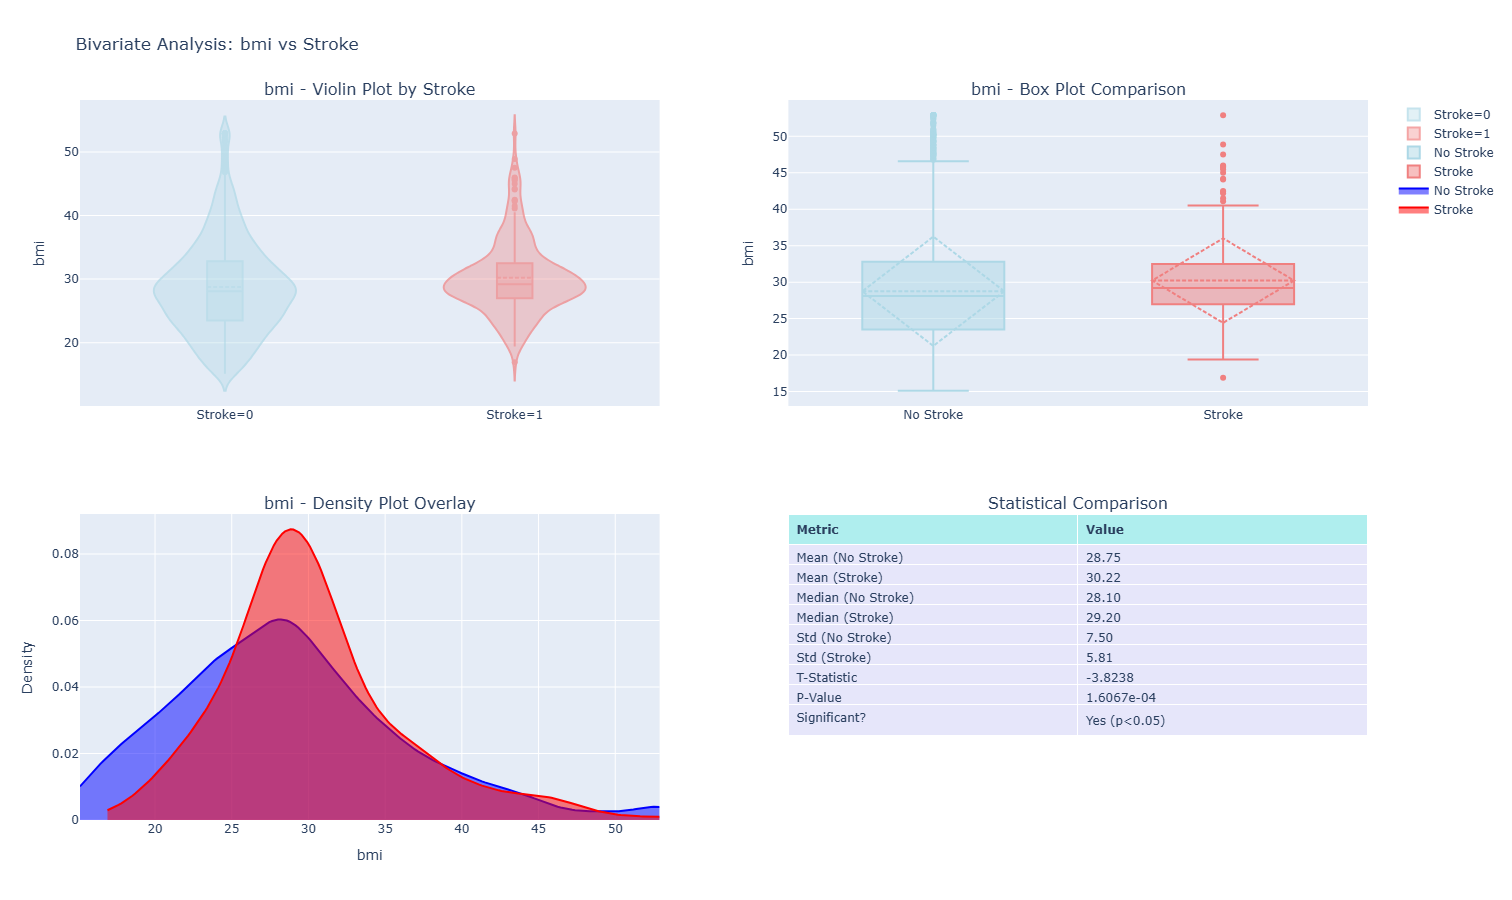

bmi vs Stroke:
  Mean difference: 1.47
  T-statistic: -3.8238, P-value: 1.6067e-04
  Significant: Yes
  

In [ ]:
df_bi = df.copy()

df_bi['gender'] = df.filter(like="gender_").idxmax(axis=1).str.replace("gender_", "")
df_bi['work_type'] = df.filter(like="work_type_").idxmax(axis=1).str.replace("work_type_", "")
df_bi['smoking_status'] = df.filter(like="smoking_status_").idxmax(axis=1).str.replace("smoking_status_", "")

# Convert binary encoded columns to readable labels
df_bi['ever_married'] = df_bi['ever_married'].map({0: "No", 1: "Yes"})
df_bi['Residence_type'] = df_bi['Residence_type'].map({0: "Rural", 1: "Urban"})

# Final list of categorical variables to analyze
categorical_cols = ['gender', 'work_type', 'smoking_status', 'ever_married', 'Residence_type']


for col in categorical_cols:

    crosstab = pd.crosstab(df_bi[col], df_bi['stroke'], normalize='index') * 100
    crosstab_counts = pd.crosstab(df_bi[col], df_bi['stroke'])

    # Chi-square test
    chi2, p_val, dof, expected = stats.chi2_contingency(crosstab_counts)


    fig = make_subplots(
        rows=1, cols=3,
        subplot_titles=(
            f'{col} - Stacked Bar (%)',
            f'{col} - Grouped Bar (Count)',
            'Chi-Square Test Summary'
        ),
        specs=[[{'type': 'bar'}, {'type': 'bar'}, {'type': 'table'}]],
        column_widths=[0.35, 0.35, 0.30]
    )


    fig.add_trace(
        go.Bar(
            x=crosstab.index, y=crosstab[0], name='No Stroke',
            text=crosstab[0].round(1), texttemplate='%{text}%', textposition='inside',
            marker_color='lightblue'
        ),
        row=1, col=1
    )
    fig.add_trace(
        go.Bar(
            x=crosstab.index, y=crosstab[1], name='Stroke',
            text=crosstab[1].round(1), texttemplate='%{text}%', textposition='inside',
            marker_color='lightcoral'
        ),
        row=1, col=1
    )

    # Grouped count bar chart
    fig.add_trace(
        go.Bar(
            x=crosstab_counts.index, y=crosstab_counts[0], name='No Stroke',
            text=crosstab_counts[0], textposition='auto',
            marker_color='lightblue', showlegend=False
        ),
        row=1, col=2
    )
    fig.add_trace(
        go.Bar(
            x=crosstab_counts.index, y=crosstab_counts[1], name='Stroke',
            text=crosstab_counts[1], textposition='auto',
            marker_color='lightcoral', showlegend=False
        ),
        row=1, col=2
    )

    # Chi-square results table
    chi_table = pd.DataFrame({
        'Metric': ['Chi-Square Statistic', 'P-Value', 'Degrees of Freedom', 'Significant?', 'Association Strength'],
        'Value': [
            f"{chi2:.4f}",
            f"{p_val:.4e}",
            f"{dof}",
            "Yes (p < 0.05)" if p_val < 0.05 else "No (p ≥ 0.05)",
            "Strong" if p_val < 0.01 else "Moderate" if p_val < 0.05 else "Weak/None"
        ]
    })

    fig.add_trace(
        go.Table(
            header=dict(values=['<b>Metric</b>', '<b>Value</b>'],
                        fill_color='paleturquoise', align='left'),
            cells=dict(values=[chi_table['Metric'], chi_table['Value']],
                       fill_color='lavender', align='left', height=30)
        ),
        row=1, col=3
    )

    fig.update_layout(
        title_text=f"Bivariate Analysis: {col} vs Stroke",
        height=500,
        barmode='stack'
    )

    fig.update_xaxes(title_text=col, row=1, col=1)
    fig.update_xaxes(title_text=col, row=1, col=2)
    fig.update_yaxes(title_text='Percentage', row=1, col=1)
    fig.update_yaxes(title_text='Count', row=1, col=2)

    fig.show()


    print(f"\n{col} vs Stroke:")
    print(f"  Chi-square: {chi2:.4f}")
    print(f"  P-value: {p_val:.4e}")
    print(f"  Association: {'Significant' if p_val < 0.05 else 'Not Significant'}")



gender vs Stroke:
  Chi-square: 0.4726
  P-value: 7.8955e-01
  Association: Not Significant



work_type vs Stroke:
  Chi-square: 49.1635
  P-value: 5.3977e-10
  Association: Significant



smoking_status vs Stroke:
  Chi-square: 29.1473
  P-value: 2.0854e-06
  Association: Significant



ever_married vs Stroke:
  Chi-square: 58.9239
  P-value: 1.6389e-14
  Association: Significant



Residence_type vs Stroke:
  Chi-square: 1.0816
  P-value: 2.9833e-01
  Association: Not Significant


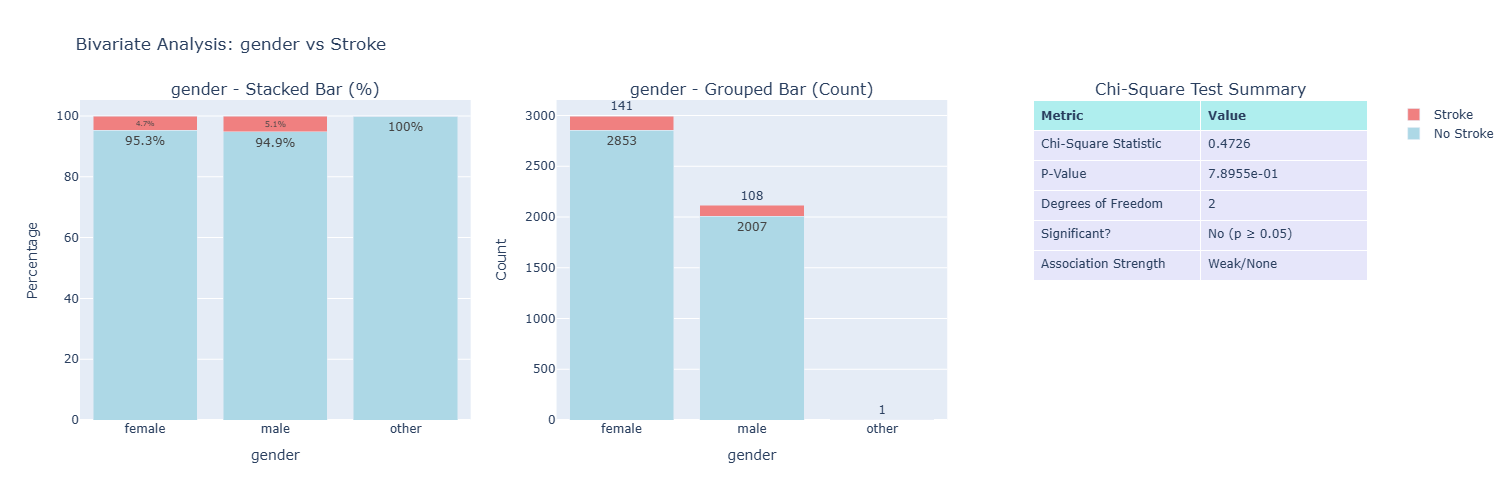

gender vs Stroke:
  Chi-square: 0.4726
  P-value: 7.8955e-01
  Association: Not Significant

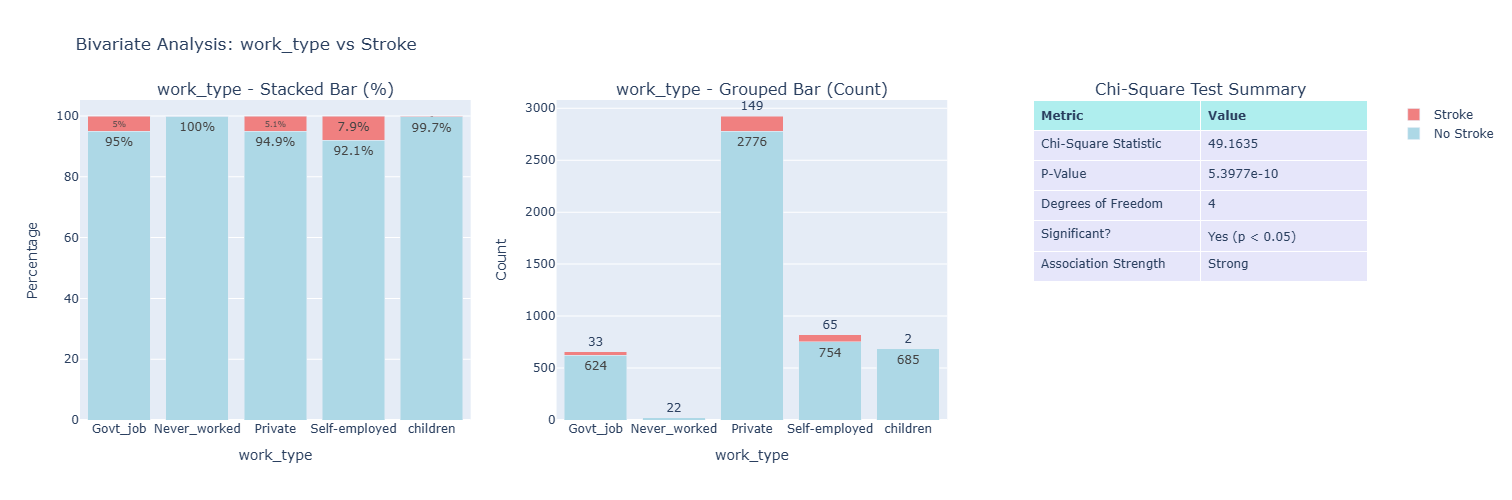

work_type vs Stroke:
  Chi-square: 49.1635
  P-value: 5.3977e-10
  Association: Significant

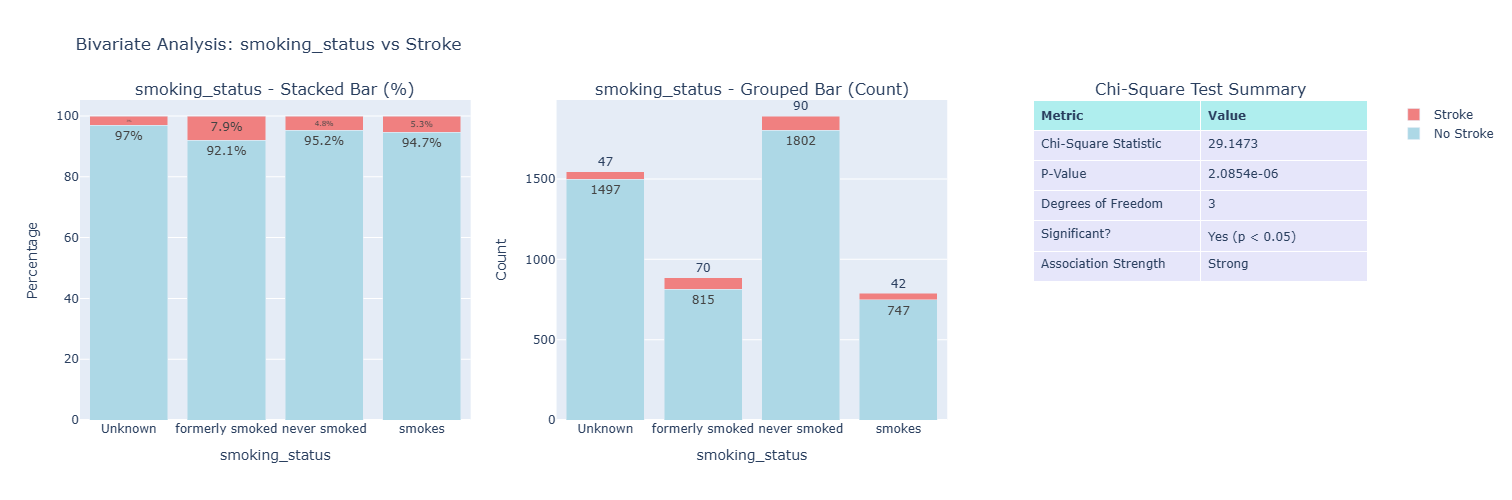

smoking_status vs Stroke:
  Chi-square: 29.1473
  P-value: 2.0854e-06
  Association: Significant

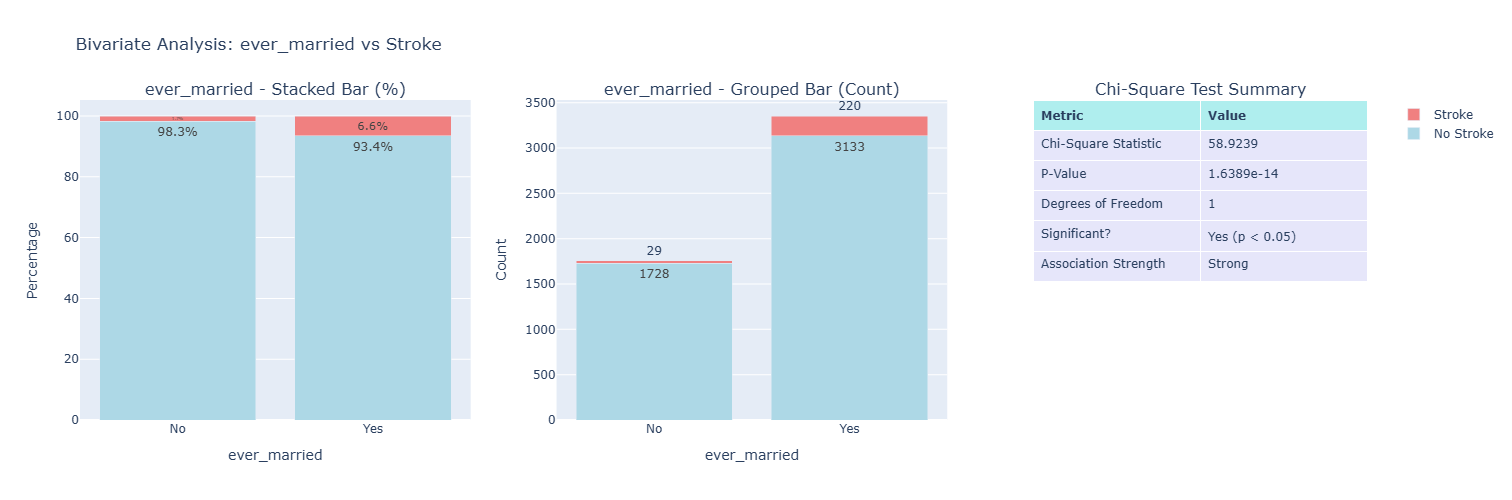


ever_married vs Stroke:
  Chi-square: 58.9239
  P-value: 1.6389e-14
  Association: Significant

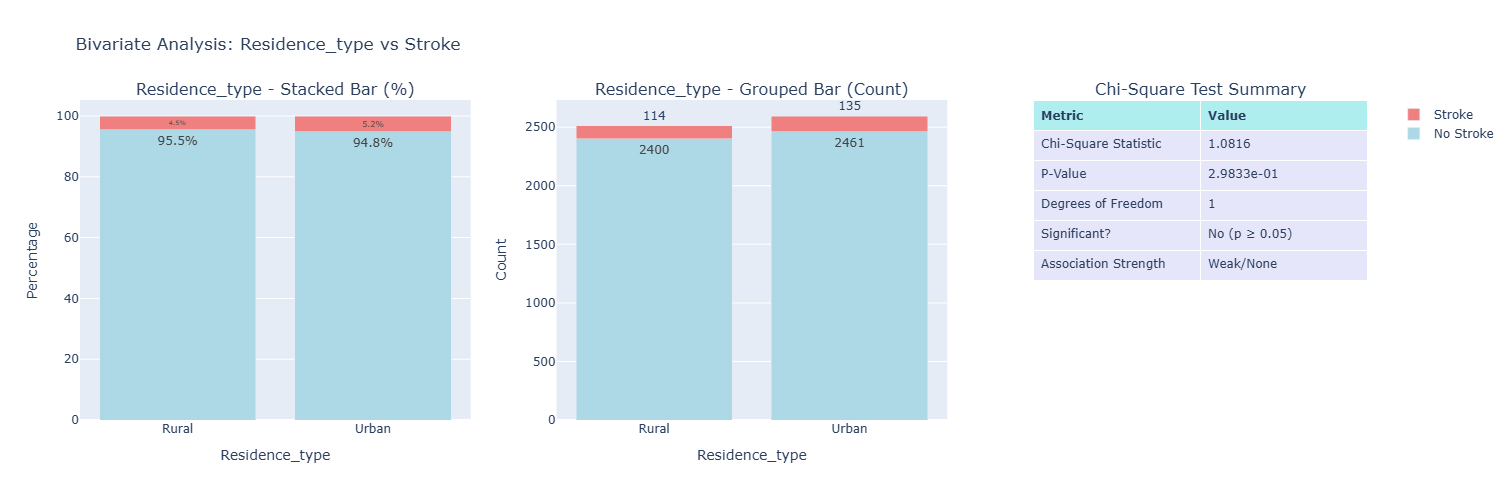


Residence_type vs Stroke:
  Chi-square: 1.0816
  P-value: 2.9833e-01
  Association: Not Significant

In [ ]:
# Correlation Analysis - Enhanced
correlation_cols = ['age', 'hypertension', 'heart_disease', 'avg_glucose_level', 'bmi', 'stroke']
corr_matrix = df[correlation_cols].corr()

# Correlation heatmap with annotations
fig = go.Figure(data=go.Heatmap(
    z=corr_matrix.values,
    x=corr_matrix.columns,
    y=corr_matrix.columns,
    colorscale='RdBu',
    zmid=0,
    text=corr_matrix.values.round(3),
    texttemplate='%{text}',
    textfont={"size": 11},
    colorbar=dict(title="Correlation")
))
fig.update_layout(
    title='Correlation Matrix - Pearson Correlation Coefficients',
    width=800,
    height=700,
    xaxis=dict(side='bottom')
)
fig.show()

print("\nTop Correlations with Stroke:")
stroke_corr = corr_matrix['stroke'].abs().sort_values(ascending=False)[1:]
for var, corr_val in stroke_corr.items():
    print(f"  {var}: {corr_matrix.loc[var, 'stroke']:.4f}")


Top Correlations with Stroke:
  age: 0.2453
  heart_disease: 0.1349
  avg_glucose_level: 0.1311
  hypertension: 0.1279
  bmi: 0.0425


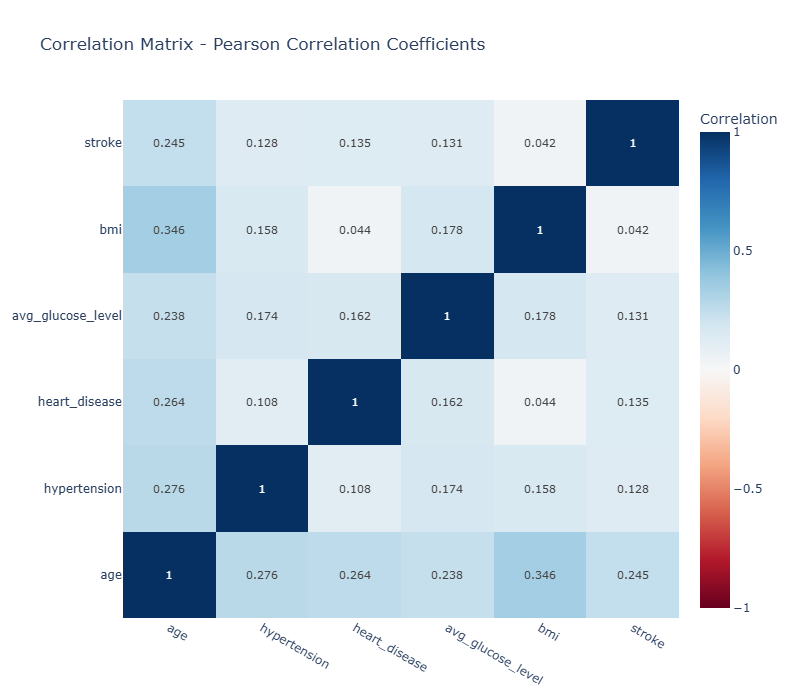

Top Correlations with Stroke:
  age: 0.2453
  heart_disease: 0.1349
  avg_glucose_level: 0.1311
  hypertension: 0.1279
  bmi: 0.0425

In [ ]:
import plotly.express as px
import numpy as np

# Base scatter matrix
fig = px.scatter_matrix(
    df,
    dimensions=numerical_cols,
    color='stroke',
    title='Scatter Matrix: Numerical Features by Stroke Status',
    height=1200,
    width=1400,
    opacity=0.5,
    color_discrete_map={
        0: 'rgba(0, 102, 204, 0.4)',
        1: 'rgba(255, 0, 0, 0.9)'
    }
)

stroke_values = df['stroke'].values

# Larger markers for stroke
sizes = np.where(stroke_values == 1, 7, 3)

for trace in fig.data:
    trace.marker.size = sizes

fig.show()


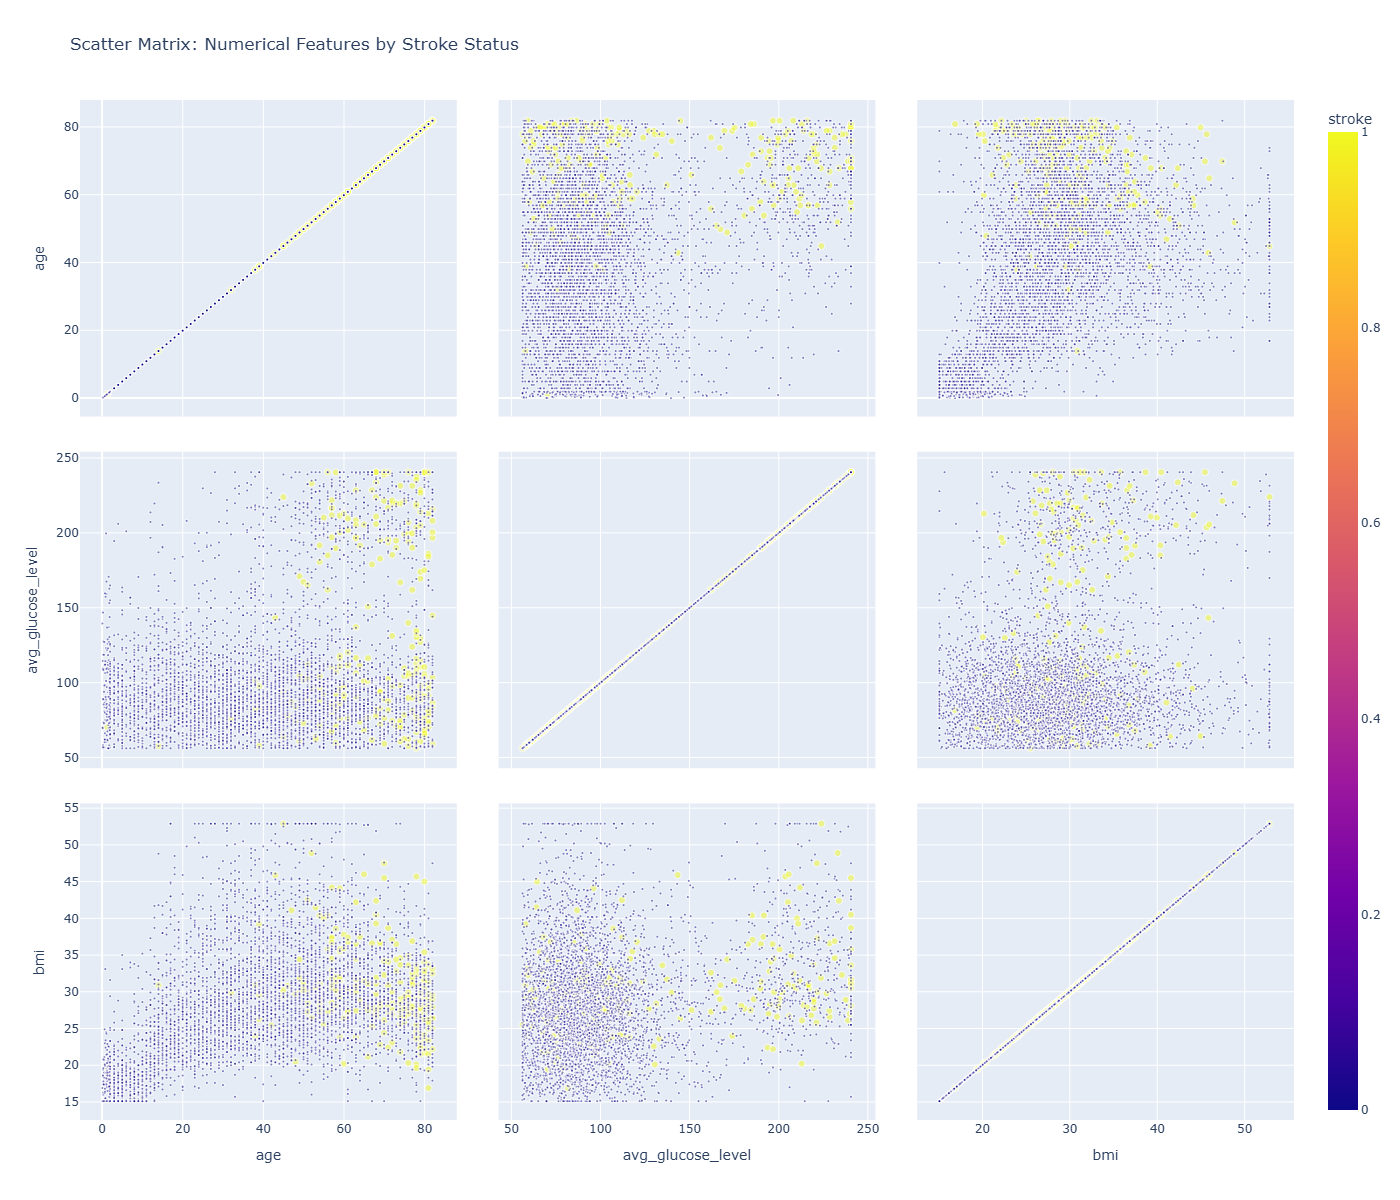

In [ ]:
import plotly.express as px

fig = px.scatter_3d(
    df,
    x='age',
    y='avg_glucose_level',
    z='bmi',
    color='stroke',
    title='3D Scatter: Age vs Glucose vs BMI',
    opacity=0.75,
    color_discrete_map={
        0: 'rgba(0, 0, 0, 0.5)',
        1: 'rgba(255, 0, 0, 0.95)'
    },
    labels={'stroke': 'Stroke Status'}
)

fig.update_traces(marker=dict(size=4))

fig.update_layout(
    height=900,
    width=1300,
    title_font_size=22,
    scene=dict(
        xaxis_title='Age',
        yaxis_title='Average Glucose Level',
        zaxis_title='BMI',
        camera=dict(eye=dict(x=1.7, y=1.7, z=0.8))
    )
)

fig.show()


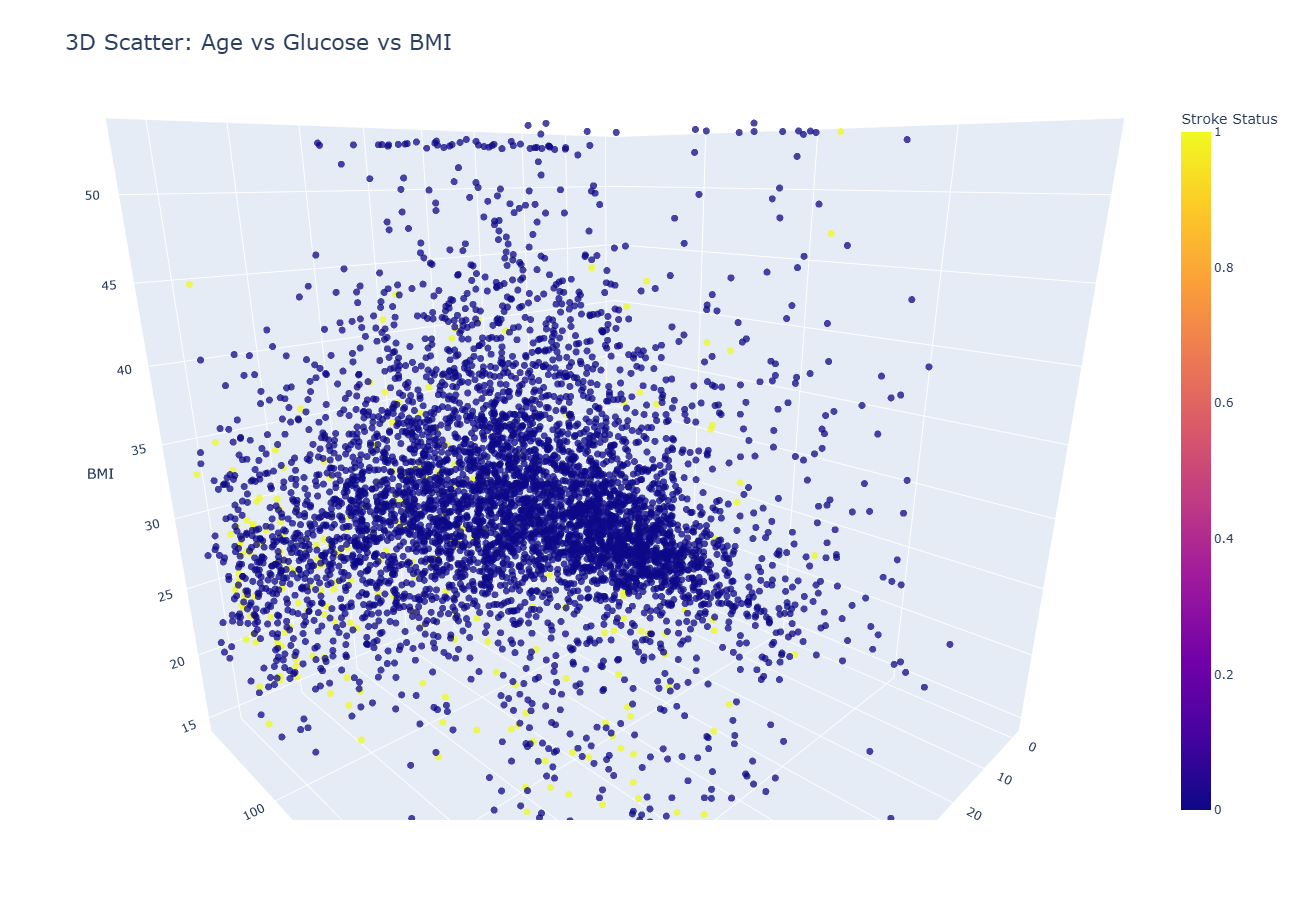

In [ ]:
# PCA Analysis - Enhanced
pca = PCA(n_components=min(5, len(numerical_cols)))
pca_features = ['age', 'hypertension', 'heart_disease', 'avg_glucose_level', 'bmi']
pca_result = pca.fit_transform(df[pca_features])

# Scree plot
fig = go.Figure()
fig.add_trace(go.Bar(
    x=[f'PC{i+1}' for i in range(len(pca.explained_variance_ratio_))],
    y=pca.explained_variance_ratio_,
    marker_color='steelblue',
    text=pca.explained_variance_ratio_.round(3),
    texttemplate='%{text:.1%}',
    textposition='auto'
))
fig.add_trace(go.Scatter(
    x=[f'PC{i+1}' for i in range(len(pca.explained_variance_ratio_))],
    y=np.cumsum(pca.explained_variance_ratio_),
    mode='lines+markers',
    name='Cumulative',
    line=dict(color='red', width=2),
    marker=dict(size=8)
))
fig.update_layout(
    title='PCA Scree Plot - Explained Variance',
    xaxis_title='Principal Component',
    yaxis_title='Explained Variance Ratio',
    height=500
)
fig.show()

print(f"PCA Explained Variance Ratios: {pca.explained_variance_ratio_}")
print(f"Cumulative Variance Explained: {np.cumsum(pca.explained_variance_ratio_)}")


PCA Explained Variance Ratios: [0.79636202 0.18523293 0.01835605]
Cumulative Variance Explained: [0.79636202 0.98159496 0.999951  ]


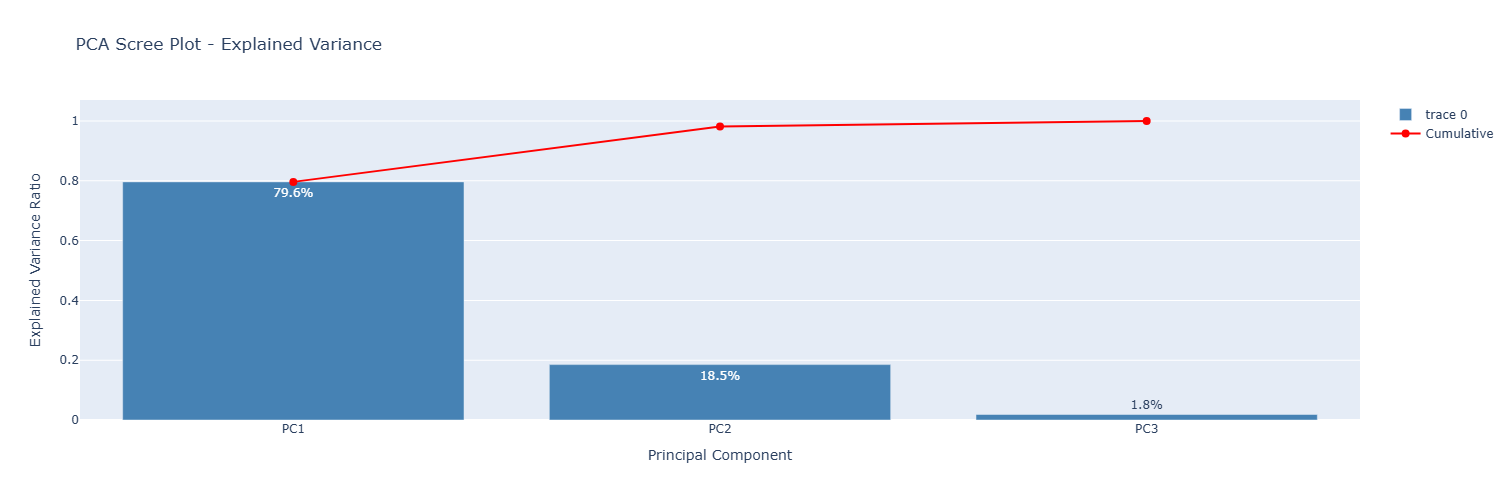

PCA Explained Variance Ratios: [0.79636202 0.18523293 0.01835605]
Cumulative Variance Explained: [0.79636202 0.98159496 0.999951  ]

In [ ]:
# PCA 2D Scatter with improved visualization
pca_df = pd.DataFrame(data=pca_result[:, :2], columns=['PC1', 'PC2'])
pca_df['stroke'] = df['stroke'].values

fig = px.scatter(
    pca_df, x='PC1', y='PC2', color='stroke',
    title=f'PCA Biplot (Explains {sum(pca.explained_variance_ratio_[:2])*100:.1f}% of variance)',
    labels={'stroke': 'Stroke Status'},
    opacity=0.6,
    color_discrete_map={0: 'blue', 1: 'red'},
    marginal_x='histogram',
    marginal_y='histogram'
)
fig.update_layout(height=600, legend=dict(title='Stroke Status'))
fig.show()


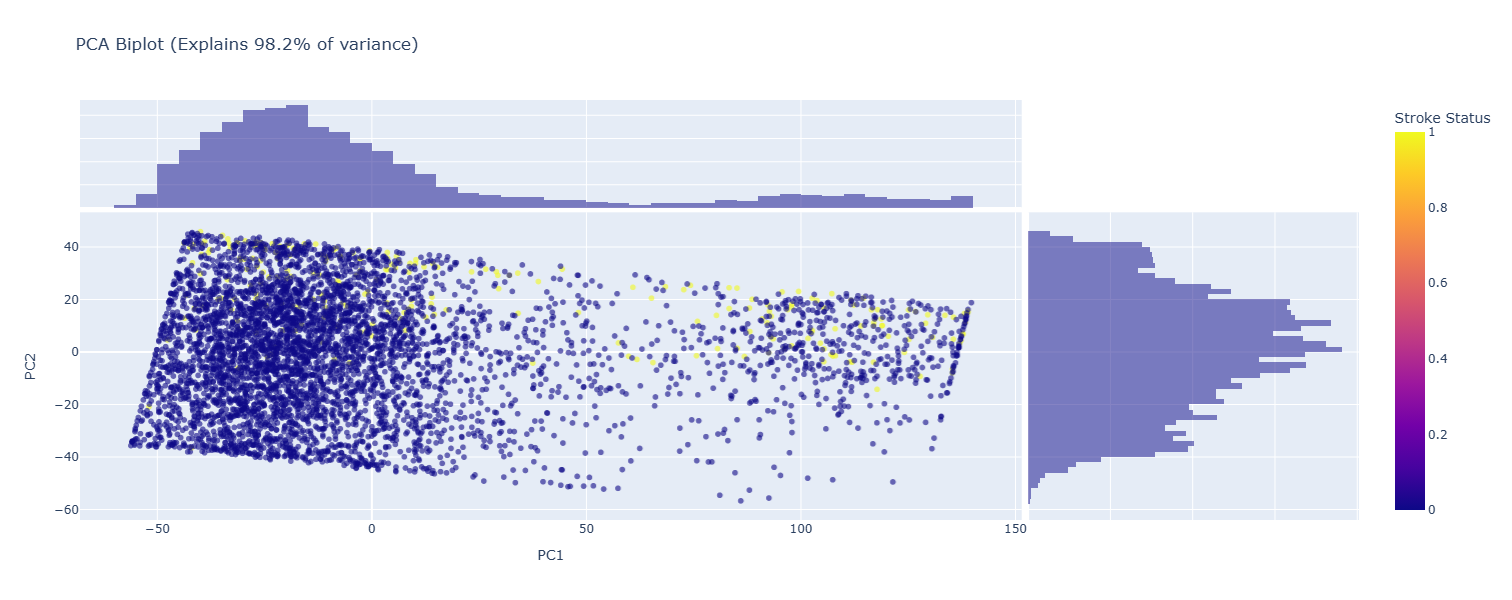

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
X_temp = df.drop(columns=['stroke'])
if 'id' in X_temp.columns:
    X_temp = X_temp.drop(columns=['id'])
y_temp = df['stroke']
rf_model.fit(X_temp, y_temp)

feature_importance = pd.DataFrame({
    'Feature': X_temp.columns,
    'Importance': rf_model.feature_importances_
}).sort_values('Importance', ascending=False)

fig = px.bar(
    feature_importance,
    x='Importance',
    y='Feature',
    orientation='h',
    title='Feature Importance (Random Forest)',
    text='Importance',
    color='Importance',
    color_continuous_scale='Viridis'
)
fig.update_traces(texttemplate='%{text:.4f}', textposition='outside')
fig.update_layout(height=600, yaxis={'categoryorder': 'total ascending'})
fig.show()

print("\nFeature Importance Ranking:")
for idx, row in feature_importance.iterrows():
    print(f"  {row['Feature']}: {row['Importance']:.4f}")



Feature Importance Ranking:
  avg_glucose_level: 0.2724
  age: 0.2432
  bmi: 0.2285
  Residence_type: 0.0348
  hypertension: 0.0269
  heart_disease: 0.0237
  work_type_Private: 0.0205
  smoking_status_never smoked: 0.0193
  ever_married: 0.0187
  gender_male: 0.0178
  gender_female: 0.0173
  work_type_Self-employed: 0.0160
  smoking_status_Unknown: 0.0159
  smoking_status_formerly smoked: 0.0156
  smoking_status_smokes: 0.0151
  work_type_Govt_job: 0.0132
  work_type_children: 0.0012
  work_type_Never_worked: 0.0000
  gender_other: 0.0000

COMPREHENSIVE EDA COMPLETED


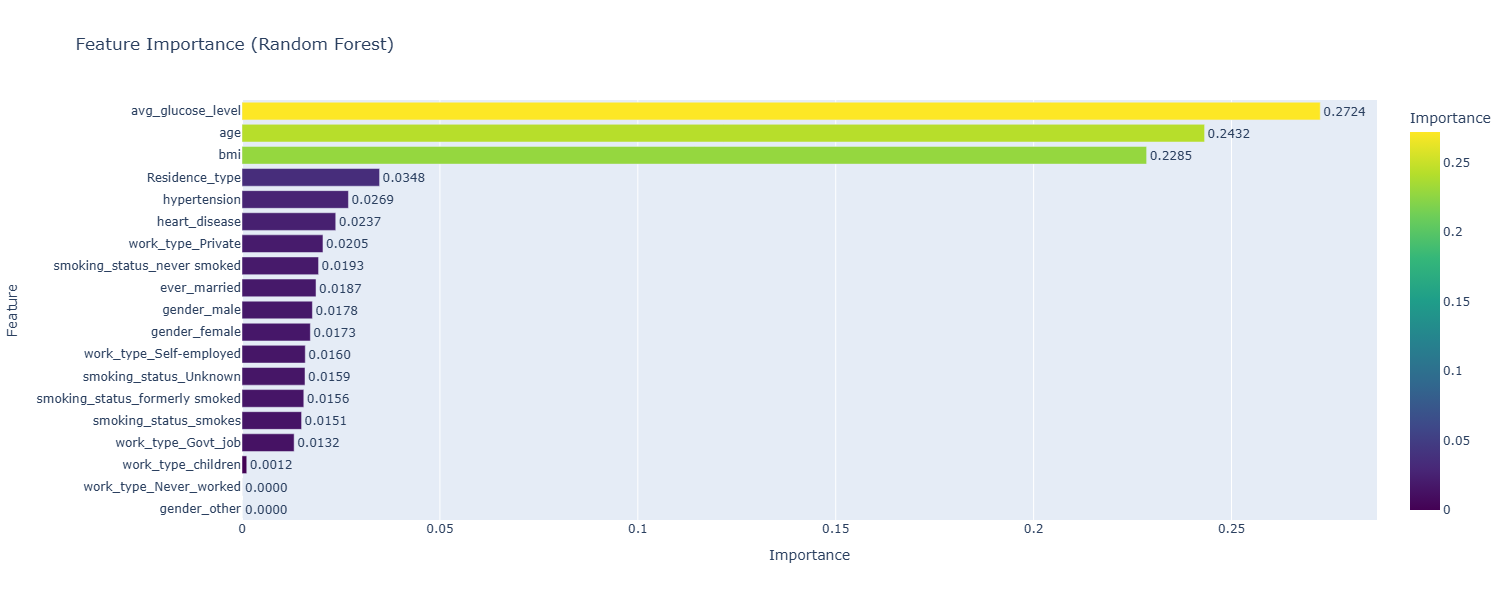

In [ ]:
import os

# Define your project folder name
project_folder = "/content/drive/MyDrive/Stroke_GenAI_Project"

# Create folder if it doesn't exist
os.makedirs(project_folder, exist_ok=True)

# Save file inside the project folder
output_path = os.path.join(project_folder, "clean_stroke_data.csv")
df.to_csv(output_path, index=False)

print("\n=== Preprocessed data saved successfully! ===")
print(f"Location: {output_path}")
print(f"Final dataset shape: {df.shape}")
print("\nEDA Complete!")



=== Preprocessed data saved successfully! ===
Location: /content/drive/MyDrive/Stroke_GenAI_Project/clean_stroke_data.csv
Final dataset shape: (5110, 21)

EDA Complete!
